In [1]:
from manim import *
import math
import numpy as np
from manim_slides import *
#Instructions for using manim-slides/manim in Jupyter and then how to render final product:
#1. Make a function in each scene callsed:
# DELAY = 0.1
# def pause(self):
#   self.wait(DELAY)
#   self.next_slide()
#2. Put self.pause() after every animation where you want to pause
#3. Decide to use either manim-slides or manim jupyter magic for the notebook:
# a. For manim-slides make each class MyScene(Slide) and then use:
#    %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true data_uri=false
#    Controls: Toggle Full Screen (F), Quit (Q), Play/Pause (Space), Next (Right), Previous (Left), Reverse (V), Replay (R), Hide/Show Mouse (H).
#    See all slides (Esc)
#    custom cli commands other than controls=false can be found at. https://manim-slides.eertmans.be/latest/reference/customize_html.html
# b. For regular manim video use class MyScene(Scene) and then use:
#    %%manim -ql -v CRITICAL MySlide
#    -ql means quality low, this is useful for faster rendering during development
#    Can also use: --progress_bar [display|leave|none] for the progress bar
#.   -v WARNING sets the verboisty level to "WARNING"
#.  Muse comment out #self.next_slide() in the pause function.
#4. Other tips:
#Use self.next_section(skip_animations=True)
#    ...code you want to skip the animations for here...
#    self.next_section() 
# to speed up development
#
# When ready to render do:
# 1. Comment out all the jupyter magic and all the next_section(skip_animations=True)
# 2. Save as all_scenes.py file with all the scenes
# 3. In terminal run:
# manim -qh all_scenes.py Scene1 Scene2 Scene3
# manim-slides present Scene1 Scene2 Scene3
#
# Manim juptyer magic commands:
# %%manim -ql -v WARNING MyScene
# %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true


/Users/mnica/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mnica/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
## Global Variables and Stuff ##
DELAY = 2

In [3]:
## Global Variables to Store Final Mobjects Passed Between Scenes ##
FINAL_MOBJECTS = None

In [4]:
# %%manim_slides -ql -v WARNING MySlide --manim-slides controls=true data_uri=false
# config.media_embed = True

# class MySlide(Slide):
#     def pause(self):
#         self.wait(0.1)
#         self.next_slide()
#     def construct(self):
#         square = Square()
#         circle = Circle()

#         self.play(Create(square))
#         self.pause()
        
#         self.play(Transform(square, circle))
#         self.pause()
        
#         text = MathTex("test").to_edge(UP)
#         self.play(FadeIn(text,shift=DOWN))
#         self.pause()

In [5]:
texPre = TexTemplate()
texPre.add_to_preamble(r"""
    \usepackage{amsmath}
    \usepackage{amssymb}
    \newcommand{\E}{\mathbb{E}}
    \newcommand{\vect}[1]{\mathbf{#1}}
""") 
max_color = GREY_A
E_color = GREY_B
n_color = BLUE_C
X_color = BLUE_B
m_color = ORANGE #YELLOW_C
U_color = RED_A
Delta_color = RED_A
S_color = PURPLE_A
dot_color = RED_B
k_color = GREEN_C
N_color = PURPLE_A
t2cD = {
    "\E":E_color,
    "\mathbb{P}":E_color,
    "\mathbb{P }":E_color,
    "[" : E_color,
    "]" : E_color,
    "n ": n_color,
    "X ": X_color,
    "m ": m_color,
    "\Delta ": Delta_color,
    "U ": U_color,
    "S ": S_color,
    "k ": k_color,
    "N ": N_color,
    "N_": N_color,
}
Mihai = Rectangle(
    width=0.01, #3,        # Width of the rectangle
    height=0.01, #4,       # Height of the rectangle
    fill_color=BLACK, #WHITE,  # Fill color
    fill_opacity=0.0 #0.3  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
)

Mihai.to_corner(DL,buff=0)

hint_fs = 50
nm_Hints = MathTex( r"n : \text{Sides per Dice},",r"\text{  }", r" m : \text{Nu{m} of Dice Rolled}", #  r"\text{ }", r"X : \text{Dice RV,} ", r"\text{ }", r"U : \text{Unif}[0,1] \text{ RV}", # r", $U=$ Unif$[0,1]$ R.V.",
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)
X_Hint = MathTex( r"X {\sim} \text{Dice}\{1, .., n \} ", 
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)       
U_Hint = MathTex( r"U ", r"{\sim}\text{Unif}(0,1)",
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)       
Delta_Hint = MathTex( r"\Delta ", r"{\sim}\text{Unif}(0,1)",
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)       

XU_Hints = VGroup(X_Hint,U_Hint,Delta_Hint).arrange(RIGHT) 

XU_Hints.next_to(nm_Hints,DOWN)
XU_Hints.align_to(nm_Hints,LEFT)

Hints = VGroup(nm_Hints,XU_Hints)
Hints.to_corner(DR)


my_fontsize = 65
my_fs = 100

DELAY = 0.1


def rotate_list(lst, n):
    n = n % len(lst)  # Handle cases where n > len(lst)
    return lst[n:] + lst[:n]

def cumulative_sum(lst):
    result = [0]  # Start with 0
    total = 0
    for num in lst:
        total += num
        result.append(total)
    return result



In [6]:
fs2 = 60
FINAL_MOBJECTS = None
FINAL_MOBJECTS_2 = None
FINAL_MOBJECTS_3 = None

FINAL_MOBJECTS_TWOTERM_1 = None
FINAL_MOBJECTS_TWOTERM_2 = None

FINAL_MOBJECTS_TERM3 = None

Manim Community v0.18.1

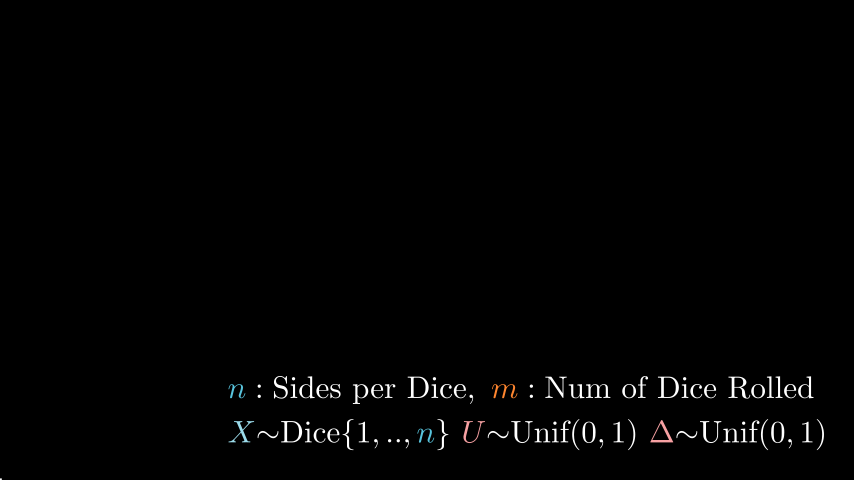

In [7]:
#%%manim -ql -v CRITICAL HintsTest
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class HintsTest(Scene):
    def construct(self):
        self.add(Mihai,Hints)

In [27]:
#%%manim_slides -ql -v WARNING Intro --manim-slides controls=true
#%%manim -ql -v CRITICAL Intro 
##-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class Intro(Slide): #(Slide)
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        ###
        #self.next_section(skip_animations=True) #comment out for manim-slides
        ###
        
         
        
        
        self.add(Mihai) #,nm_Hints,X_Hint)
        self.pause()
        thumb = ImageMobject("StandUpMathsThumb.jpg")
        thumb.scale(1)
        #thumb.next_to(Mihai,buff=0.8)
        thumb.to_edge(LEFT,buff=3.8)
        thumb.to_edge(DOWN,buff=0.1)
        self.add(thumb)
        
        intro_fs = 80
        intro_text = MathTex(r"\text{Roll a }"," 20 ", r"\text{ sided dice }\,", " 2 ", r"\,\text{ times}",
                           tex_template=texPre, tex_to_color_map=t2cD,font_size=intro_fs)#print(*enumerate(eqn),sep='\n')
        intro_text[1].color = n_color
        intro_text[3].color = m_color
        intro_text.to_edge(UP,buff=0.25)
        
        formula_fs = 60
        avg_max = MathTex(r"\text{Average }",r"\text{Maximum}"," = ","13.825",
                              tex_template=texPre, tex_to_color_map=t2cD,font_size=formula_fs)#print(*enumerate(eqn),sep='\n')
        avg_max.next_to(intro_text,DOWN,buff=0.7)
        avg_max[-1].scale(1.2)
        uline = Underline(avg_max[1])
        
        Q = MathTex(r"?",r"?",r"?",r"?",r"?",r"?",
                              tex_template=texPre, tex_to_color_map=t2cD,font_size=80)#print(*enumerate(eqn),sep='\n')
        for i in range(len(Q)):
            if i%2 == 0:
                Q[i].color = n_color
            else:
                Q[i].color = m_color
        
        
        Q.move_to(avg_max[-1])
        Q.align_to(avg_max[-1],LEFT)
        
        n = MathTex(" n ",tex_template=texPre, tex_to_color_map=t2cD,font_size=intro_fs)#print(*enumerate(eqn),sep='\n')
        n.move_to(intro_text[1])
        n.align_to(intro_text[1],DOWN)
        
        Q.align_to(avg_max[-1],DOWN)
        
        m = MathTex(" m ",tex_template=texPre, tex_to_color_map=t2cD,font_size=intro_fs)#print(*enumerate(eqn),sep='\n')
        m.move_to(intro_text[3])
        m.align_to(intro_text[3],DOWN)
        
        
        
        self.play(Write(intro_text))
        self.pause()
        
        self.play(LaggedStart(Write(avg_max[0:2]),
                              Create(uline),lag_ratio=0.75))
        self.pause()
        
        self.play(LaggedStart(FadeIn(avg_max[2],shift=RIGHT),
                              FadeIn(avg_max[3],shift=RIGHT),lag_ratio=0.75))
        self.pause()
        
        self.play(FadeIn(n,shift=DOWN),FadeOut(intro_text[1],shift=DOWN))
        self.play(FadeIn(m,shift=DOWN),FadeOut(intro_text[3],shift=DOWN))
        self.play(FadeIn(Q,shift=DOWN),FadeOut(avg_max[-1],shift=DOWN))
        avg_max[-1].color = BLACK
        intro_text[1].color = BLACK
        intro_text[3].color = BLACK
        self.pause()
        
        
        
        formula = MathTex(r"\approx", 
                          r"{", r"m ",r"\over",r"{m +1}", r"}", r" n ",
                          r"+", r"{ 1 \over 2}",
                          r"-", r"{", r" m ", r"\over", r"{12", r"n ", r"}", r"}",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=formula_fs)
        #print(*enumerate(formula),sep='\n')
        
        
        avg_max.generate_target()
        avg_max.target.to_edge(LEFT,buff=1.0)
        avg_max.target[2:].color = BLACK
        avg_max.target[2:].set_opacity(0)
        self.play(MoveToTarget(avg_max),FadeOut(uline,Q,shift=LEFT))
        
        
        formula.next_to(avg_max[1],RIGHT)
        
        self.add(formula[0])
        
        
        self.play(LaggedStart(FadeIn(formula[0:2],shift=RIGHT),
                              FadeIn(formula[2:10],shift=RIGHT),
                              FadeIn(formula[10:12],shift=RIGHT),
                              lag_ratio=0.5))
        self.pause()
        
        self.play(FadeIn(formula[12:],shift=RIGHT))
        self.pause()
        
        dice_errors_2 = ImageMobject("dice_errors_2.png")
        dice_errors_2.width = thumb.width*1.15
        #dice_errors_2.height = thumb.height
        
        dice_errors_2.move_to(thumb)
        dice_errors_2.align_to(thumb,DOWN)
        
        
        avg_max.generate_target()
        avg_max.target.to_edge(UP)
        formula.generate_target()
        formula.target.set_y(avg_max.target.get_y())
        
        
        
        self.play(MoveToTarget(avg_max),MoveToTarget(formula),FadeOut(thumb),FadeOut(intro_text,n,m,shift=UP),FadeIn(dice_errors_2))
        self.pause()
        
        dice_errors_3 = ImageMobject("dice_errors_3.png")
        dice_errors_3.height = dice_errors_2.height
        #dice_errors_2.height = thumb.height
        
        dice_errors_3.move_to(thumb)
        dice_errors_3.align_to(thumb,DOWN)
        
        self.play(FadeOut(dice_errors_2),FadeIn(dice_errors_3))
        self.pause()
        
        self.play(FadeOut(dice_errors_3))
        self.pause()
        
        
        br_fs = 60
        #print(*enumerate(formula),sep='\n')
        br1 = Brace(formula[1:10], sharpness=0.8)
        br1_label = MathTex(r"\text{Symmetry!}",font_size=br_fs).next_to(br1,DOWN)
        self.play(FadeIn(br1,br1_label,shift=DOWN))
        self.pause()
        
        
        #### ARCS HERE
        
        num_arcs = 4
        spaces = [0.2, 0.35, 0.15, 0.3] #must sum to 1
        original_U_vals = cumulative_sum(spaces) #[0] + non_trivial_U_vals + [1]
        U_vals = cumulative_sum(spaces)
        angles = [2*PI*U_vals[i] for i in range(num_arcs+1)]
        mycolor = [WHITE,WHITE,WHITE,WHITE] #[RED, BLUE, ORANGE, GREEN]
        END_PT_COLOR = GREY
        lbl_txt = [r"S _1",r"S _2",r"S _3",r"S _4"]
        
        my_radius = 1.25
        
        arcs = [Arc(radius=my_radius,start_angle=angles[i],angle=angles[i+1]-angles[i]) for i in range(num_arcs)]
        labels = [ MathTex(lbl_txt[i],
                           tex_template=texPre, tex_to_color_map=t2cD,font_size = my_fontsize) for i in range(num_arcs)]
        braces = [ArcBrace(arcs[i],RIGHT) for i in range(num_arcs)]
        arc_dots = [Dot([my_radius*math.cos(angles[i]),my_radius*math.sin(angles[i]),0],color=dot_color,radius=0.1) for i in range(num_arcs) ]
        arc_dots[0].set_color(END_PT_COLOR)
        
        for i in range(num_arcs):
            labels[i].move_to(1.0*braces[i].get_tip())# num_arc_points//2])
            arcs[i].set_color(mycolor[i])
            #labels[i].set_color(mycolor[i])
            
        VGroup(*arcs,*labels,*braces,*arc_dots).shift(0.5*DOWN) #.to_edge(DOWN,buff=0.2)
        
        self.play(FadeIn(*arcs,*labels,*arc_dots,shift=DOWN))
        self.wait(1)
        
        
        for perm in range(num_arcs):
            if perm < num_arcs - 1:
                label_anims = [labels[k].animate.move_to(labels[(k+1)%num_arcs]) for k in range(num_arcs)]
                #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                self.play(*label_anims, arc_dots[(perm+1)%num_arcs].animate.set_color(GREY),arc_dots[perm].animate.set_color(dot_color)  ) #, *dot_anims)
        self.pause()
        
        self.play(FadeOut(*arcs,*labels,*arc_dots,shift=DOWN))
        
        
        #### ARCS END
        
        ####
        ####
        #self.next_section()
        ####
        ####
        
        
        
        br2 = Brace(formula[10:12], sharpness=0.8)
        br2_label = MathTex(r"\text{Rounding}",font_size=br_fs).next_to(br2,DOWN)
        self.play(FadeOut(br1,br1_label,shift=DOWN),FadeIn(br2,br2_label,shift=DOWN))
        self.pause()
        
        br3 = Brace(formula[12:], sharpness=0.8)
        br3_label = MathTex(r"\text{Birthday Paradox}",font_size=br_fs).next_to(br3,DOWN)
        self.play(FadeOut(br2,br2_label,shift=DOWN),FadeIn(br3,br3_label,shift=DOWN))
        self.pause()
        
        
        
        #####
        #####
        #return 0
        #####
        #####
        
        
        
        my_nm_Hints = nm_Hints.copy().scale(1.2)
        
        my_nm_Hints.next_to(formula,DOWN,buff=1.0)
        my_nm_Hints.set_x(0)
        
        self.next_section()
        
        self.play(FadeOut(br3,br3_label,shift=DOWN))
        self.play(FadeIn(my_nm_Hints,shift=DOWN))
        self.pause()
        
        #return 0
        
        
        
        my_nm_Hints.generate_target()
        my_nm_Hints.target = nm_Hints.copy()
        
        
        self.play(MoveToTarget(my_nm_Hints))
        self.remove(my_nm_Hints)
        self.add(nm_Hints)
        self.pause()
        
        X_Hint_scale = 1.2
        my_X_Hint = X_Hint.copy().scale(X_Hint_scale)
        my_X_Hint.next_to(formula,DOWN,buff=2.4)
        my_X_Hint.set_x(2)
        
        
        self.play(FadeIn(my_X_Hint,shift=DOWN))
        self.pause()
        
        
        E_max = MathTex(r"\E", r"[", r" \max\{", r"X _1,", r"..," , r"X _{m }",  r"\}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=formula_fs)
        
        E_max.next_to(formula,LEFT)
        self.play(FadeIn(E_max,shift=DOWN),FadeOut(avg_max,shift=DOWN))
        self.pause()
        
        new_fs = 58
        
        E_min = MathTex(r"\E", r"[", r" \min\{", r"X _1,", r"..," , r"X _{m }",  r"\}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=new_fs)
        E_min.next_to(E_max,DOWN,buff=1.2)
        E_min.to_edge(LEFT,buff=0.1)
       
        
        
        
    
        
        self.play(TransformMatchingTex(E_max.copy(),E_min))
        self.pause()
        
        
        my_X_Hint_n = MathTex(r"n +1-", r"X {\sim} \text{Dice}\{1, .., n \} ", 
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs).scale(X_Hint_scale)  
        
        
        my_X_Hint_n.next_to(my_X_Hint,DOWN)
        my_X_Hint_n.align_to(my_X_Hint,RIGHT)
        self.play(TransformMatchingTex(my_X_Hint.copy(),my_X_Hint_n))
        self.pause()
        
        E_min_n = MathTex(r"=\!", r"\E", r"[", r" \min\{", r"n \!+\!1", r"\!-\! ", r"X _1,", r"..," , r"n \!+\!1", r"\!-\!", r"X _{m }",  r"\}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=new_fs)
       
        E_min_n.next_to(E_min,RIGHT)
        
        
        
        
        
        self.play(TransformMatchingTex(E_min.copy(),E_min_n,path_arc=90*DEGREES))
        self.pause()
        
        E_min_n2 = MathTex(r"=\!", r"n \!+\!1",r"+",r"\E", r"[", r" \min\{", r"\!-\! ", r"X _1,", r"..," , r"\!-\!", r"X _{m }",  r"\}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=new_fs)
        E_min_n2.next_to(E_min,RIGHT)
        
        
        self.play(TransformMatchingTex(E_min_n,E_min_n2,path_arc=-90*DEGREES))
        self.pause()
        
        E_min_n2A = MathTex(r"=\!", r"n \!+\!1",r"+",r"\E", r"[", r"\min\{", r"\!-\!", r"X _1,", r"..," , r"\!-\!", r"X _{m }",  r"\}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=new_fs)
        E_min_n2A.move_to(E_min_n2)
        self.add(E_min_n2A)
        self.remove(E_min_n2) #fix the "-" so all the same latex
        
        E_min_n3 = MathTex(r"=\!", r"n \!+\!1",r"\!-\!",r"\E", r"[", r"\max\{", r"X _1,", r"..," , r"X _{m }",  r"\}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=new_fs)
        E_min_n3.next_to(E_min,RIGHT)
        
        self.play(TransformMatchingTex(E_min_n2A,E_min_n3,path_arc=-90*DEGREES,key_map={r"\min\{":r"\max\{"}))
        self.pause()
        
        E_min_n4 = MathTex(r"\approx \!", r"n \!+\!1",r"\!-\!",
                           "\Big(", r"{", r"m",r"\over",r"{m +1}", r"}", r" n ",
                          r"+", r"{ 1 \over 2}",
                          r"-", r"{", r" m ", r"\over", r"{12", r"n ", r"}", r"}", "\Big)",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=new_fs)
        #print(*enumerate(E_min_n4),sep='\n')
        E_min_n4[6].color = m_color #manual color the m here because of TransformMatchingTex shenanigans
        E_min_n4.next_to(E_min,RIGHT)
        
        
        
        
        #print(*enumerate(E_min_n3),sep='\n')
        self.play(ReplacementTransform(formula[1:].copy(),E_min_n4[5:25]),
                  FadeOut(E_min_n3[4:],shift=DOWN), FadeIn(E_min_n4[4],E_min_n4[25],shift=DOWN),
                  FadeOut(E_min_n3[0],shift=DOWN), ReplacementTransform(formula[0].copy(),E_min_n4[0]))
        self.pause()
        self.remove(*[mob for mob in E_min_n3]) #,E_min_n2,E_min_n2A)
        self.add(E_min_n4)
        
        E_min_big = MathTex(r"\E", r"[", r" \min\{", r"X _1,", r"..," , r"X _{m }",  r"\}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=formula_fs)
        E_min_big.set_y(E_min.get_y())
        E_min_big.align_to(E_max,RIGHT)
        E_min.generate_target()
        E_min.target = E_min_big
        
        formula_min =  formula = MathTex(r"\approx", 
                          r"{", r"1 ",r"\over",r"{m +1}", r"}", r"n ",
                          r"+", r"{ 1 \over 2}",
                          r"+", r"{", r" m ", r"\over", r"{12", r"n ", r"}", r"}",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=formula_fs)
        formula_min.next_to(E_min.target,RIGHT)
        self.play(MoveToTarget(E_min),TransformMatchingTex(E_min_n4,formula_min))
        self.pause()
       
           
        eqn = MathTex(r"{", r"1^m ", r"\!+\!2^m ", r"\!+\!\ldots", r"\!+\! n ^m ", r"\over", r"n ^m }",
                      r"\approx", 
                      r"{", r"1 ",r"\over",r"{m +1}", r"}", r"n ",
                      r"+", r"{ 1 \over 2}",
                      r"+", r"{", r" m ", r"\over", r"{12", r"n ", r"}", r"}",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=formula_fs)#print(*enumerate(eqn),sep='\n')
        print(*enumerate(eqn),sep='\n')
        eqn.next_to(formula_min,DOWN,buff=0.5)
        eqn.align_to(formula_min,RIGHT)
        
        my_X_Hint.generate_target()
        my_X_Hint.target = X_Hint.copy() 
        
        my_eq = MathTex("=",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=formula_fs)#print(*enumerate(eqn),sep='\n')
        
        my_eq.next_to(E_min,DOWN,buff=0.3)
        self.play(MoveToTarget(my_X_Hint),FadeOut(my_X_Hint_n,shift=DOWN),
                  LaggedStart(FadeIn(my_eq,shift=DOWN),
                              FadeIn(eqn[0:15],shift=DOWN),lag_ratio=0.75))
        self.remove(my_X_Hint)
        self.add(X_Hint)
        self.pause()
        
        self.play(Transform(my_eq,eqn[15].copy()),ReplacementTransform(formula_min.copy(),eqn[15:]))
        self.remove(my_eq)
        self.pause()
        
        
        label = MathTex(r"\text{Faulhaber's Sum of Powers Formula!}",font_size=formula_fs)
        label.next_to(eqn,DOWN,buff=0.3)
        label.to_edge(RIGHT)
        self.play(FadeIn(label,shift=DOWN))
        self.pause()
        
        
        mobjects_to_keep = [nm_Hints,Mihai,X_Hint]
        mobjects_to_fade = set(self.mobjects)-set(mobjects_to_keep)
        #print(mobjects_to_fade)
        self.play(FadeOut(*mobjects_to_fade,shift=DOWN)) # for mobj in mobjects_to_fade])
        self.pause()
        
        #eqn2 = MathTex(r"1^m ", r"\!+\!2^m ", r"\!+\!\ldots", r"\!+\! n ^m ",
        #              r"\approx", 
        #              r"{", r"1 ",r"\over",r"{m +1}", r"}", r"n ", r"^ {m +1 }"
        #              r"+", r"{ 1 \over 2}",r"n ^m "
        #              r"+", r"{", r" m ", r"\over", r"{12", r"}", r"}", r"n ^{m -1}",
        #              tex_template=texPre, tex_to_color_map=t2cD,font_size=formula_fs)#print(*enumerate(eqn),sep='\n')
        #print(*enumerate(eqn2),sep='\n')
        #eqn2.next_to(formula_min,DOWN,buff=0.5)
        #eqn2.shift(RIGHT*(eqn[15].get_x()-eqn2[9].get_x()))
        ####
        
        
        ###
        #self.next_section()
        ###
        #self.play(TransformMatchingTex(eqn,eqn2))
        #self.pause()
        
        
        
        #return 0
        
        
        #self.add(uline,intro_text,avg_max)

Manim Community v0.18.1

(0, SingleStringMathTex('{'))
(1, SingleStringMathTex('1^'))
(2, SingleStringMathTex('m '))
(3, SingleStringMathTex('\\!+\\!2^'))
(4, SingleStringMathTex('m '))
(5, SingleStringMathTex('\\!+\\!\\ldots'))
(6, SingleStringMathTex('\\!+\\! '))
(7, SingleStringMathTex('n '))
(8, SingleStringMathTex('^'))
(9, SingleStringMathTex('m '))
(10, SingleStringMathTex('\\over'))
(11, SingleStringMathTex('n '))
(12, SingleStringMathTex('^'))
(13, SingleStringMathTex('m '))
(14, SingleStringMathTex('}'))
(15, SingleStringMathTex('\\approx'))
(16, SingleStringMathTex('{'))
(17, SingleStringMathTex('1 '))
(18, SingleStringMathTex('\\over'))
(19, SingleStringMathTex('{'))
(20, SingleStringMathTex('m '))
(21, SingleStringMathTex('+1}'))
(22, SingleStringMathTex('}'))
(23, SingleStringMathTex('n '))
(24, SingleStringMathTex('+'))
(25, SingleStringMathTex('{ 1 \\over 2}'))
(26, SingleStringMathTex('+'))
(27, SingleStringMathTex('{'))
(28, SingleStringMathTex(' '))
(29, SingleStringMathTex('m '))
(30, Singl

[12/27/24 15:49:07] WARNING  data_uri option is currently automatically enabled, because using ]8;id=667838;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=594113;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [9]:
#%%manim_slides -ql -v WARNING MinIsSum --manim-slides controls=true
#%%manim -ql -v CRITICAL MinIsSum
#%%manim_slides -ql -v WARNING ThreeTerm2--manim-slides controls=true
##-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class MinIsSum(Slide): #(Slide)
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        ###
        #self.next_section(skip_animations=True) #comment out for manim-slides
        ###
        self.add(Mihai,nm_Hints,X_Hint)
        self.pause()
        fs2 = 55
        #self.next_section()
        first_term = MathTex(r"\text{Average Minimum is Sum of Powers:}",font_size=60)
        
        first_term.to_edge(UP)
        uline = Underline(first_term)
        
        eqn = MathTex(r"\E[", r" \min\{", r"X _1", r",", r"..,",
                          r"X _m  ",  r"\}", r"] = {", r"1^m ", r"+2^m ", r"+\ldots", r"+ (n -1)^m ",r"+ n ^m ", r"\over", r"n ^m }",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)#print(*enumerate(eqn),sep='\n')
        my_offx=0.1
        eqn.next_to(first_term,DOWN,buff=0.8).shift(my_offx*LEFT)
        
        
        self.play(Write(first_term),Create(uline))
        self.play(Write(eqn))
        self.pause()
        
        eqn.generate_target()
        eqn.target.to_corner(UL).shift(my_offx*LEFT)
        eqn.target.shift(0.35*DOWN)
        eqn.target[13:].color = BLACK
        self.play(MoveToTarget(eqn),FadeOut(first_term,uline,shift=UP))
        self.pause()
        
        #return 0
        
        #return 0
        
        
        Peqns = VGroup()
        for mystr in [("1","="),("2","+"),"LDOTS",("n -1","+"),("n ","+")]:
            if mystr == "LDOTS":
                Peqns.add(MathTex(r"\vdots",tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2))
            else:
                Peqns.add(MathTex(mystr[1],
                              r" \mathbb{P }",r"(", r" \min\{", r"X _1", r",", r"..", r",",
                              r"X _m ",  r"\} \geq ",mystr[0], r")", 
                              # r" + \mathhb{P} (", r" \min\{", r"X _1", r",", r"..,",
                              #r"X _m  ",  r"\} \geq 1", r") +  ",
                             tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2))
        Peqns.arrange(DOWN,aligned_edge=LEFT)
        Peqns.next_to(eqn[12],RIGHT)
        Peqns.align_to(eqn[12],UP)
        
        #for p in Peqns:
        #    p.align_to(Peqns[0],LEFT)
        
        
        self.play(LaggedStart(*[FadeIn(p,shift=RIGHT) for p in Peqns],lag_ratio=0.5))
        self.pause()
        
        Peqns2 = VGroup()
        for mystr in [("1","="),("2","+"),"LDOTS",("n \!-\!1","+"),("n ","+")]:
            if mystr == "LDOTS":
                Peqns2.add(MathTex(r"\vdots",tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2))
            else:
                Peqns2.add(MathTex(mystr[1], r" \mathbb{P }",r"(",
                                  r"X _1", r"\geq",mystr[0], r"\text{\scriptsize{ and ... and }}",
                                  r"X _m ", r"\!\geq\!",mystr[0],
                                  r")", 
                              # r" + \mathhb{P} (", r" \min\{", r"X _1", r",", r"..,",
                              #r"X _m  ",  r"\} \geq 1", r") +  ",
                             tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2))
        Peqns2.arrange(DOWN,aligned_edge=LEFT)
        Peqns2.next_to(eqn[12],RIGHT)
        Peqns2.align_to(eqn[12],UP)
        
        #for p in Peqns2:
        #    p.align_to(Peqns2[0],LEFT)
        
        self.play(LaggedStart(*[TransformMatchingTex(Peqns[i],Peqns2[i]) for i in range(5)],lag_ratio=0.5))
        #self.play(LaggedStart(*[ReplacementTransform(Peqns[i],Peqns2[i]) for i in range(4)],lag_ratio=0.5))
        
        self.pause()
        
        ###
        #return 0
        ###
        
        Peqns3 = VGroup()
        for mystr in [("1","="),("2","+"),"LDOTS",("n -1","+"),("n ","+")]:
            if mystr == "LDOTS":
                Peqns3.add(MathTex(r"\vdots",tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2))
            else:
                Peqns3.add(MathTex(mystr[1], r" \mathbb{P }",r"(",
                                  r"X _1", r"\geq ",mystr[0],
                                  r")", 
                                  r"^m ",
                              # r" + \mathhb{P} (", r" \min\{", r"X _1", r",", r"..,",
                              #r"X _m  ",  r"\} \geq 1", r") +  ",
                             tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2))
        Peqns3.arrange(DOWN,aligned_edge=LEFT)
        Peqns3.next_to(eqn[12],RIGHT)
        Peqns3.align_to(eqn[12],UP)
        
        #for p in Peqns3:
        #    p.align_to(Peqns3[0],LEFT)
       
        self.play(LaggedStart(*[TransformMatchingTex(Peqns2[i],Peqns3[i]) for i in range(5)],lag_ratio=0.5))
        #self.play(LaggedStart(*[ReplacementTransform(Peqns[i],Peqns2[i]) for i in range(4)],lag_ratio=0.5))
        
        self.pause()
        
        
       
        Peqns4 = VGroup()
        for mystr in [("n ","="),(r"\scriptstyle{(}n -1\scriptstyle{)}","+"),"LDOTS",("2 ","+"),("1 ","+")]:
            if mystr == "LDOTS":
                Peqns4.add(MathTex(r"\vdots",tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2))
            else:
                Peqns4.add(MathTex(mystr[1], r"(",
                                  r"{",mystr[0],r" / ","n ",r"}",
                                  r")", 
                                  r"^m ",
                              # r" + \mathhb{P} (", r" \min\{", r"X _1", r",", r"..,",
                              #r"X _m  ",  r"\} \geq 1", r") +  ",
                             tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2))
        Peqns4.arrange(DOWN,aligned_edge=LEFT)
        
        Peqns4.next_to(eqn[12],RIGHT)
        Peqns4.align_to(eqn[12],UP)
        #for p in Peqns4:
        #    p.align_to(Peqns4[0],LEFT)
        
        self.play(LaggedStart(*[TransformMatchingTex(Peqns3[i],Peqns4[i]) for i in range(5)],lag_ratio=0.5))
        #self.play(LaggedStart(*[ReplacementTransform(Peqns[i],Peqns2[i]) for i in range(4)],lag_ratio=0.5))
        
        self.pause()
       
        eqn2 = MathTex(r"\E[", r" \min\{", r"X _1", r",", r"..,",
                          r"X _m  ",  r"\}", r"] = {", r"1^m ", r"+2^m ", r"+\ldots", r"+ (n -1)^m ",r"+ n ^m ", r"\over", r"n ^m }",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqn2.move_to(eqn)
        
        print(*enumerate(eqn2),sep='\n')
        
        
        ###
        self.next_section()
        ###
        print(*enumerate(Peqns4[0]),sep='\n')
        self.play(ReplacementTransform(Peqns4[0][1:],eqn2[23:27]),
                  ReplacementTransform(Peqns4[1],eqn2[19:23]),
                  ReplacementTransform(Peqns4[2],eqn2[18]),
                  ReplacementTransform(Peqns4[3],eqn2[16:18]),
                  ReplacementTransform(Peqns4[4],eqn2[14:16]),
                  ReplacementTransform(Peqns4[0][0],eqn2[13]),
                  FadeIn(eqn2[27:],shift=UP))
        self.pause()
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        
        #self.next_section()
        
        
        checkmark.next_to(eqn2[13],DOWN,buff=0.75)
        self.play(FadeIn(checkmark,shift=DOWN))
        self.pause()
        

Manim Community v0.18.1

(0, SingleStringMathTex('\\E'))
(1, SingleStringMathTex('['))
(2, SingleStringMathTex(' \\min\\{'))
(3, SingleStringMathTex('X '))
(4, SingleStringMathTex('_1'))
(5, SingleStringMathTex(','))
(6, SingleStringMathTex('..,'))
(7, SingleStringMathTex('X '))
(8, SingleStringMathTex('_'))
(9, SingleStringMathTex('m '))
(10, SingleStringMathTex(' '))
(11, SingleStringMathTex('\\}'))
(12, SingleStringMathTex(']'))
(13, SingleStringMathTex(' = {'))
(14, SingleStringMathTex('1^'))
(15, SingleStringMathTex('m '))
(16, SingleStringMathTex('+2^'))
(17, SingleStringMathTex('m '))
(18, SingleStringMathTex('+\\ldots'))
(19, SingleStringMathTex('+ ('))
(20, SingleStringMathTex('n '))
(21, SingleStringMathTex('-1)^'))
(22, SingleStringMathTex('m '))
(23, SingleStringMathTex('+ '))
(24, SingleStringMathTex('n '))
(25, SingleStringMathTex('^'))
(26, SingleStringMathTex('m '))
(27, SingleStringMathTex('\\over'))
(28, SingleStringMathTex('n '))
(29, SingleStringMathTex('^'))
(30, SingleStringMathTex('m '))

[12/27/24 15:32:15] WARNING  data_uri option is currently automatically enabled, because using ]8;id=752054;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=187457;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [10]:
#ONE TERM APPROX STARTS HERE

In [11]:
#%%manim_slides -ql -v WARNING OneTerm1 --manim-slides controls=true

#%%manim -ql -v WARNING FirstApprox
#-ql = quality low. change to -qh before final production
#WARNING = only show critical errors

#manim-slides usage:
#%%manim_slides -ql -v WARNING MySlide --manim-slides controls=false 
#Controls: Toggle Full Screen (F), Quit (Q), Play/Pause (Space), Next (Right), Previous (Left), Reverse (V), Replay (R), Hide/Show Mouse (H).
#commands other than controls=false can be found at. https://manim-slides.eertmans.be/latest/reference/customize_html.html

class OneTerm1(Slide): #(Scene) for manim, (Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        self.next_slide()
    def construct(self):
        self.add(Mihai,nm_Hints,X_Hint)
        self.pause()
        # Step 2: Create a Text object using the t2c argument
        
        first_term = MathTex(r"\text{One Term Approximation:}",font_size=80)
        
        first_term.to_edge(UP)
        uline = Underline(first_term)
        want_to_show = MathTex(r"\E", r"[", r" \max\{", r"X _1,", r"X _2,", r"..," , r"X _{m }",  r"\}", r"]",
                               r"{\approx}",
                               r"{", r"m ",r"\over",r"{m +1}", r"}", r" n ", 
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=80)
        print(*enumerate(want_to_show),sep="\n")
        #self.add(want_to_show)
        want_to_show.next_to(first_term,DOWN)
        self.play(Write(first_term),Create(uline))
        self.pause()
        
        self.play(LaggedStart(FadeIn(want_to_show[0:14],shift=DOWN),
                              FadeIn(want_to_show[14],shift=RIGHT),
                              FadeIn(want_to_show[15:22],shift=RIGHT),
                              FadeIn(want_to_show[-1],shift=RIGHT),lag_ratio=0.5),run_time=3)
        
        self.pause()
        
        approx = MathTex(r"X ", r" \approx", r"n ", r"U ",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs)
        
        # Step 3: Add the colored text to the scene
        
        #self.add(text)
        #approx.to_edge(UP)
        self.play(Write(approx))
        #self.add(approx)
        self.pause()
        
        Unif = MathTex(r"U ", r"{\sim}\text{Unif}(0,1)",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=70)
        
        Unif.next_to(nm_Hints,UP) #approx[-1],RIGHT,buff=0.8)
        Unif.to_edge(RIGHT)
        self.play(ReplacementTransform(approx[-1].copy(),Unif[0]),FadeIn(Unif[1:],shift=RIGHT))
        self.pause()
        
        
        
        
        off_y = 0.8
        
        n_pts_numberline = 6
        number_line_top = NumberLine(
            x_range=[0, 6, 1],  # Range: start=-5, end=5, step=1
            length=8,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        ).shift(off_y*UP)
        
        positions_top = [number_line_top.n2p(num) for num in range(0, n_pts_numberline+1)]  # Getting positions for -4 to 4
        dots_top = VGroup(*[Dot(point=positions_top[i], color=n_color, radius=0.1) for i in range(1,n_pts_numberline+1)])
        
        X = MathTex(r"X ",font_size=my_fs,tex_to_color_map=t2cD).next_to(dots_top,UP)
        
        self.play(FadeOut(want_to_show,first_term,uline,shift=UP),approx.animate.to_edge(UP))
        self.play(Create(number_line_top))
        self.pause()
        self.play(ReplacementTransform(approx[0].copy(),VGroup(dots_top,X)))
        self.pause()
        
        
        number_line = NumberLine(
            x_range=[0,n_pts_numberline, 1],  # Range: start=-5, end=5, step=1
            length=8,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        )
            
        positions = [number_line.n2p(num) for num in range(0, n_pts_numberline+1)]  # Getting positions for -4 to 4
        dots = VGroup(*[Dot(point=positions[i], color=n_color, radius=0.1) for i in range(1,n_pts_numberline+1)])
        
        self.play(FadeIn(number_line,shift=DOWN))
        self.pause()
        
        RectOne = Rectangle(width=positions[1][0] - positions[0][0],
                            height=0.3,
                            fill_color=U_color,  # Fill color
                            fill_opacity=0.3  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
                           )
        RectOne.set_x(0.5*(positions[0][0]+positions[1][0]))
        RectOne.set_y(0.5*(positions[0][1]+positions[1][1]))
        
        U = MathTex(r"U ",font_size=my_fs,tex_to_color_map=t2cD).next_to(RectOne,DOWN)
        
        self.play(ReplacementTransform(approx[-1].copy(),VGroup(RectOne,U)))
        self.pause()
        
        RectAll = Rectangle(width=positions[n_pts_numberline][0] - positions[0][0],
                            height=0.3,
                            fill_color=n_color,  # Fill color
                            fill_opacity=0.5  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
                           )
        RectAll.set_x(0.5*(positions[0][0]+positions[n_pts_numberline][0]))
        RectAll.set_y(0.5*(positions[0][1]+positions[n_pts_numberline][1]))
        
        
        nU = MathTex(r"n ", r"U ",font_size=my_fs,tex_to_color_map=t2cD).next_to(RectAll,DOWN)
        
        n_copy = approx[-2].copy()
        self.play(n_copy.animate.move_to(U))
        self.play(ReplacementTransform(n_copy,nU[0]),ReplacementTransform(RectOne,RectAll),ReplacementTransform(U,nU[1]))
        self.pause()
        
        self.play(FadeOut(RectAll,number_line,number_line_top,dots_top,nU,X,shift=DOWN),TransformMatchingTex(Unif,U_Hint))
        self.pause()
        #self.play(Transform(approx[0].copy(),dots))
        #self.add(number_line,dots)
        
        global FINAL_MOBJECTS
        FINAL_MOBJECTS = approx

        
        self.wait()

Manim Community v0.18.1

(0, SingleStringMathTex('\\E'))
(1, SingleStringMathTex('['))
(2, SingleStringMathTex(' \\max\\{'))
(3, SingleStringMathTex('X '))
(4, SingleStringMathTex('_1,'))
(5, SingleStringMathTex('X '))
(6, SingleStringMathTex('_2,'))
(7, SingleStringMathTex('..,'))
(8, SingleStringMathTex('X '))
(9, SingleStringMathTex('_{'))
(10, SingleStringMathTex('m '))
(11, SingleStringMathTex('}'))
(12, SingleStringMathTex('\\}'))
(13, SingleStringMathTex(']'))
(14, SingleStringMathTex('{\\approx}'))
(15, SingleStringMathTex('{'))
(16, SingleStringMathTex('m '))
(17, SingleStringMathTex('\\over'))
(18, SingleStringMathTex('{'))
(19, SingleStringMathTex('m '))
(20, SingleStringMathTex('+1}'))
(21, SingleStringMathTex('}'))
(22, SingleStringMathTex(' '))
(23, SingleStringMathTex('n '))


[12/27/24 15:32:24] WARNING  data_uri option is currently automatically enabled, because using ]8;id=103126;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=437614;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [12]:
#%%manim_slides -ql -v WARNING OneTerm2 --manim-slides controls=true

#%%manim -ql -v WARNING FirstApprox
#-ql = quality low. change to -qh before final production
#WARNING = only show critical errors

#manim-slides usage:
#%%manim_slides -ql -v WARNING MySlide --manim-slides controls=false 
#manim slides test
#Controls: Toggle Full Screen (F), Quit (Q), Play/Pause (Space), Next (Right), Previous (Left), Reverse (V), Replay (R), Hide/Show Mouse (H).
#commands other than controls=false can be found at. https://manim-slides.eertmans.be/latest/reference/customize_html.html

class OneTerm2(Slide): #(Scene) for manim, (Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        self.next_slide()
    def construct(self):
        
        approx = FINAL_MOBJECTS.copy()
        self.add(Mihai,nm_Hints,X_Hint, U_Hint, approx)
        self.pause()
        
        eqnLHS = MathTex(r"\E[", r" \max\{", r"X _1,", r"X _2,", r"..," , r"X _{m }",  r"\}", r"]",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        #print(list(enumerate(eqnLHS)))
        
        eqnEq = MathTex(r"\approx",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        eqnRHS = MathTex(r" \max\{", r"n ", r" U _1,", r"n ", r" U _2,", r"..," , r"n ", r" U _{m }",  r"\}",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        #eqnRHS[0].color = BLACK #hide the expected value on init
        #eqnRHS[1].color = BLACK
        #eqnRHS[-1].color = BLACK
        
        
        #print(list(enumerate(eqnRHS)))
        
        eqns = VGroup(eqnLHS, eqnEq, eqnRHS).arrange(RIGHT).next_to(approx,DOWN,buff=0.6)
        eqns.shift( (eqnEq.get_x() - approx[1].get_x())*LEFT )
        
        eqnRHS2 = MathTex(r"\E[", r"n ", r" \max\{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS2[0].color = BLACK
        eqnRHS2[1].color = BLACK
        eqnRHS2[-1].color = BLACK
        eqnRHS2.set_y(eqnRHS.get_y())
        eqnRHS2.align_to(eqnRHS,LEFT)
        
        eqnRHS3 = MathTex(r"n ",r"\E[",  r" \max\{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS3.set_y(eqnRHS.get_y())
        eqnRHS3.align_to(eqnRHS,LEFT)
        
        
        #self.add(eqns)
        #self.play(*[ReplacementTransform(approx[0].copy(),eqnLHS) for i in [1,2,3,4]])
        
        #self.play(Write(eqnLHS))
        
        #write in X_1,X_2,...,X_m from the X
        self.play(LaggedStart(*[ReplacementTransform(approx[0].copy(),mob) 
                                for mob in [eqnLHS[3:5],eqnLHS[5:7],eqnLHS[7],eqnLHS[8:12]]],
                               lag_ratio=0.7),
                  run_time = 2,
                 )
        
        #Write in \approx
        self.play(ReplacementTransform(approx[1].copy(),eqnEq))
        
        #Write in nU_1, \ldots ,nU_m
        self.play(LaggedStart(*[ReplacementTransform(approx[2:4].copy(),mob) 
                                for mob in [eqnRHS[1:5],eqnRHS[5:9],eqnRHS[9],eqnRHS[10:16]]],
                               lag_ratio=0.7),
                  run_time = 2,
                 )
        self.pause()
        
        #add in the max to LHS and RHS
        self.play(FadeIn(eqnLHS[2],eqnRHS[0],shift=RIGHT),FadeIn(eqnLHS[12],eqnRHS[-1],shift=LEFT))
        self.pause()
        
        #group the factor of n to the outslide
        self.play(TransformMatchingTex(eqnRHS,eqnRHS2,path_arc=-90 * DEGREES))
        self.pause()
        
        #prepare and fade in E
        eqnRHS2[0].color = E_color #recolor these which were hidden before
        eqnRHS2[1].color = E_color
        eqnRHS2[-1].color = E_color
        self.play(FadeIn(eqnLHS[0],eqnLHS[1],eqnRHS2[0],eqnRHS2[1],shift=RIGHT),FadeIn(eqnLHS[-1],eqnRHS2[-1],shift=LEFT))
        self.pause()
        
        #pull factor of n out of E
        self.play(TransformMatchingTex(eqnRHS2,eqnRHS3,path_arc=-90 * DEGREES))
        self.pause()
        
        global FINAL_MOBJECTS_2
        FINAL_MOBJECTS_2 = approx, eqnLHS, eqnEq, eqnRHS3
        
        
        

Manim Community v0.18.1

[12/27/24 15:32:31] WARNING  data_uri option is currently automatically enabled, because using ]8;id=554664;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=327372;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [13]:
#%%manim_slides -ql -v WARNING OneTerm3 --manim-slides controls=false data_uri=False

#%%manim -ql -v WARNING FirstApprox
#-ql = quality low. change to -qh before final production
#WARNING = only show critical errors

#manim-slides usage:
#%%manim_slides -ql -v WARNING MySlide --manim-slides controls=false 
#manim slides test
#Controls: Toggle Full Screen (F), Quit (Q), Play/Pause (Space), Next (Right), Previous (Left), Reverse (V), Replay (R), Hide/Show Mouse (H).
#--manim-slides commands other than controls=false can be found at. https://manim-slides.eertmans.be/latest/reference/customize_html.html
#data_uri=false otherwise it has a flickering issues at slide changes

class OneTerm3(Slide): #(Scene) for manim, (Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        self.next_slide()
    def construct(self):
        approx, eqnLHS_old, eqnEq_old, eqnRHS_old = [mob.copy() for mob in FINAL_MOBJECTS_2]
        
        self.add(Mihai,nm_Hints,X_Hint,U_Hint,approx,eqnLHS_old, eqnEq_old, eqnRHS_old)
        self.pause()
        
        eqnLHS = MathTex(r"\E[",  r" \max\{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnEq = MathTex(r"=",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        eqnRHS = MathTex(r"{", r"m ", r"\over", r"{m + 1}", r"}",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        
        eqns = VGroup(eqnLHS, eqnEq, eqnRHS).arrange(RIGHT).next_to(eqnRHS_old,DOWN,buff=0.6)
        eqns.shift( (eqnEq.get_x() - eqnEq_old.get_x())*LEFT )
        
        will_show = MathTex(r"\text{(will show why!)}",font_size=fs2)
        will_show.next_to(eqnRHS,RIGHT)
        
        
        #self.add(eqnRHS)
        self.play(TransformMatchingTex(eqnRHS_old.copy(),eqnLHS))
        self.play(FadeIn(eqnEq,shift=RIGHT))
        self.pause()
        
        #print(list(enumerate(eqnRHS)))
        self.play(LaggedStart(*[Create(piece) for piece in eqnRHS],lag_ratio=0.75),run_time=3)
        self.play(FadeIn(will_show,shift=RIGHT))
        self.pause()
        
        eqnRHS_copy = eqnRHS.copy()
        eqnRHS_copy.generate_target()
        eqnRHS_copy.target.next_to(eqnRHS_old[0],RIGHT)
        self.play(MoveToTarget(eqnRHS_copy),FadeOut(eqnRHS_old[1:]))
        eqnRHS_old[0].generate_target()
        eqnRHS_copy.generate_target()
        eqnRHS_copy.target.next_to(eqnEq_old,RIGHT)
        eqnRHS_old[0].target.next_to(eqnRHS_copy.target,RIGHT)
        self.play(MoveToTarget(eqnRHS_copy,path_arc=-90*DEGREES),MoveToTarget(eqnRHS_old[0],path_arc=-90*DEGREES))
        self.pause()
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        
        checkmark.next_to(eqnRHS_old[0],RIGHT)
        self.play(FadeIn(checkmark,shift=RIGHT))
        self.pause()
        
        eqns.generate_target()
        my_scale_up = 1.0
        eqns.target.scale(my_scale_up)
        eqns.target.set_x(0)
        eqns.target.to_edge(UP)
        self.play(MoveToTarget(eqns),FadeOut(checkmark,will_show,approx, eqnLHS_old, eqnEq_old, eqnRHS_copy, eqnRHS_old[0]))
        self.pause()
        
        eqnLHS2 = MathTex(r"\E[",  r" \max\{", r" U _1,", r" U _2,", r" U _{3 }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).scale(my_scale_up)
        
        eqnEq2 = MathTex(r"=",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).scale(my_scale_up)
        
        
        eqnRHS2 = MathTex(r"{", r"3 ", r"\over", r"{3+1}", r"}",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).scale(my_scale_up)
        eqns2 = VGroup(eqnLHS2, eqnEq2, eqnRHS2).arrange(RIGHT).to_edge(UP)
        eqns2.shift(eqnEq.get_x()- eqnEq2.get_x())
        
        for mob in eqns2:
            mob.set_y(eqnEq.get_y())
        
        self.play(*[TransformMatchingTex(mob,mob2) for mob,mob2 in [[eqnLHS,eqnLHS2],[eqnEq,eqnEq2],[eqnRHS,eqnRHS2]] ])
        self.pause()
        
        #FadeOut(nm_Hints,X_Hint,U_Hint,shift=DOWN),
        
        
        
        global FINAL_MOBJECTS_3
        FINAL_MOBJECTS_3 = eqnLHS2, eqnEq2, eqnRHS2
        
        
        
        

Manim Community v0.18.1

[12/27/24 15:32:48] WARNING  data_uri option is currently automatically enabled, because using ]8;id=521352;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=915146;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [30]:
#%%manim_slides -ql -v CRITICAL OneTerm4 --manim-slides controls=true

#%%manim -ql -v CRITICAL MaxOfUs
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class OneTerm4(Slide):
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        self.add(Mihai,nm_Hints,X_Hint,U_Hint) #,Hints)
        self.pause()

        eqnLHS_old, eqnEq_old, eqnRHS_old = [mob.copy() for mob in FINAL_MOBJECTS_3]
        self.add(eqnLHS_old, eqnEq_old, eqnRHS_old)
        
        alt_eqn = MathTex(r"\E[",  r"U ", r"^\frac{1}{3}",  r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        alt_int = MathTex(r"\int_0^1",  r"u", r"^\frac{1}{3}",  r"\text{d}u",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        alt_eqn.next_to(eqnEq_old,RIGHT)
        alt_eqn.align_to(eqnLHS_old,DOWN)
        alt_int.next_to(eqnEq_old,RIGHT)
        if True:
            self.play(FadeOut(eqnRHS_old))
            self.pause()

            self.play(FadeIn(alt_eqn,shift=RIGHT))
            self.pause()

            self.play(FadeOut(alt_eqn,shift=RIGHT),FadeIn(alt_int,shift=RIGHT))
            self.pause()
        else:
            self.remove(eqnRHS_old)

        self.play(FadeOut(alt_int, eqnLHS_old[0:2],eqnLHS_old[-1],eqnEq_old))
        self.pause()

        number_line = NumberLine(
            x_range=[0,1, 1],  # Range: start=-5, end=5, step=1
            length=6,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        ).scale(1.5)
        self.play(Create(number_line))
        self.pause()
        
        # Values to mark with dots
        values = [0.75, 0.2, 0.6]
        num_vals = len(values)

        # Create dots at specified values
        
        dots = VGroup(*[
            Dot(point=number_line.number_to_point(value), color = dot_color, radius=0.1)
            for value in values
        ])
        
        #self.add(dots)  # Add the dots to the scene
        
         # Create underbraces from the left edge of the number line to each dot
        underbraces = VGroup(*[
            BraceBetweenPoints(
                number_line.number_to_point(0),  # Start at the left edge of the number line
                number_line.number_to_point(value),  # End at the dot's position
                #label=f"{value}",  # Label the underbrace with the value of the dot
                color=U_color # Set the color of the underbrace
            )
            for value in values
        ])
        #self.add(underbraces)  # Add the underbraces to the scene
        
        brace_labels = VGroup(*[
            MathTex(f"U _{i+1}",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(underbraces[i],DOWN)
            for i,value in enumerate(values)
        ])
        #self.add(brace_labels)  # Add the underbraces to the scene
        #print(list(enumerate(eqnLHS_old)))
        Us = [eqnLHS_old[4:6],eqnLHS_old[7:9],eqnLHS_old[10:12]]
        for k in range(num_vals+1):
            anim_list = []
            if k <= num_vals-1:
                anim_list = [ReplacementTransform(Us[k].copy(),VGroup(dots[k],underbraces[k],brace_labels[k]))]
            if k >= 1:
                anim_list.append(FadeOut(underbraces[k-1],brace_labels[k-1],shift=DOWN))
            self.play(*anim_list)
            self.wait(1)
        
        val_argmax = 0 #where did the maximum occur?
        max_brace_label = MathTex(r" \max\{", r"U _1,", r"U _2,", r"U _{3 }",  r"\}",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(underbraces[val_argmax],DOWN)
        
        self.play(ReplacementTransform(eqnLHS_old[2:-1].copy(),VGroup(underbraces[val_argmax],max_brace_label)))
        self.pause()
        #self.play(FadeOut(underbraces[val_argmax],max_brace_label,shift=DOWN))
        #self.pause()
        
        ####
        
        sorted_values = sorted(values)
        vals_with_endpoints = [0.0]+sorted_values+[1.0]
        
        x_off = 0.01
        S_braces = VGroup(*[
            BraceBetweenPoints(
                number_line.number_to_point(vals_with_endpoints[k-1]+x_off),  # Start at the left edge of the number line
                number_line.number_to_point(vals_with_endpoints[k]-x_off),  # End at the dot's position
                #label=f"{value}",  # Label the underbrace with the value of the dot
                color=S_color,  # Set the color of the underbrace
                direction = UP,
            )
            for k in range(1,num_vals+2)
        ])
        #self.add(underbraces)  # Add the underbraces to the scene
        
        S_brace_labels = VGroup(*[
            MathTex(f"S _{i+1}",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(S_braces[i],UP)
            for i in range(num_vals+1)
        ])
        
        self.play(LaggedStart(*[FadeIn(S_braces[k], S_brace_labels[k],shift=UP) for k in range(num_vals+1)],lag_ratio=0.75))
        self.pause()
        
        ###
        
        S_sum = MathTex(r"\E [ S _1 ]+\E [ S _2 ]+\E[ S _3 ]",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(underbraces[val_argmax],DOWN)
        #print(list(enumerate(S_sum)))
        Ss = [S_sum[4:6],S_sum[12:14],S_sum[19:21]]
        
        
        S_sum.next_to(eqnEq_old,RIGHT)
        
        eqnLHS_old[0:2].color=BLACK #hide the E[ 
        eqnLHS_old[-1].color = BLACK #hide the ]
        
        eqnLHS_old.generate_target()
        full_eqn = VGroup(eqnLHS_old.target,eqnEq_old,S_sum)
        full_eqn.set_x(0)
        
        anim_list = [MoveToTarget(eqnLHS_old),
                     FadeIn(eqnEq_old,shift=RIGHT), #=
                     ReplacementTransform(S_brace_labels[0].copy(),Ss[0]),
                     FadeIn(S_sum[7],shift=RIGHT), #plus
                     ReplacementTransform(S_brace_labels[1].copy(),Ss[1]),
                     FadeIn(S_sum[15],shift=RIGHT), #plus
                     ReplacementTransform(S_brace_labels[2].copy(),Ss[2]),
                    ]
                     
        self.play(LaggedStart(*anim_list,lag_ratio=0.5))
        self.pause()
        
        
        eqnLHS_old[0:2].color= E_color #un hide the E[ 
        eqnLHS_old[-1].color = E_color #un hide the ]
        
        self.play(FadeIn(eqnLHS_old[0:2],S_sum[0:3],shift=RIGHT),FadeIn(eqnLHS_old[-1],S_sum[-1],shift=LEFT))
        self.pause()
        
        
        mob_pairs = [[S_sum[0:3],S_sum[8:11]],[S_sum[0:3],S_sum[16:18]],[S_sum[-1],S_sum[6]],[S_sum[-1],S_sum[14]] ]
          
        
        self.play(*[ReplacementTransform(from_mob.copy(),to_mob,path_arc=90*DEGREES) for from_mob,to_mob in mob_pairs])
        self.pause()
        
        ###arcs code
        
        num_arcs = 4
        spaces = [0.2, 0.35, 0.15, 0.3] #must sum to 1
        original_U_vals = cumulative_sum(spaces) #[0] + non_trivial_U_vals + [1]
        U_vals = cumulative_sum(spaces)
        angles = [2*PI*U_vals[i] for i in range(num_arcs+1)]
        mycolor = [WHITE,WHITE,WHITE,WHITE] #[RED, BLUE, ORANGE, GREEN]
        END_PT_COLOR = GREY
        lbl_txt = [r"S _1",r"S _2",r"S _3",r"S _4"]
        
        my_radius = 1.25
        
        arcs = [Arc(radius=my_radius,start_angle=angles[i],angle=angles[i+1]-angles[i]) for i in range(num_arcs)]
        labels = [ MathTex(lbl_txt[i],
                           tex_template=texPre, tex_to_color_map=t2cD,font_size = my_fontsize) for i in range(num_arcs)]
        braces = [ArcBrace(arcs[i],RIGHT) for i in range(num_arcs)]
        arc_dots = [Dot([my_radius*math.cos(angles[i]),my_radius*math.sin(angles[i]),0],color=dot_color,radius=0.1) for i in range(num_arcs) ]
        arc_dots[0].set_color(END_PT_COLOR)
        
        for i in range(num_arcs):
            labels[i].move_to(1.0*braces[i].get_tip())# num_arc_points//2])
            arcs[i].set_color(mycolor[i])
            #labels[i].set_color(mycolor[i])
            
        VGroup(*arcs,*labels,*braces,*arc_dots) #.to_edge(DOWN,buff=0.2)
        
        new_dot = Dot(point=number_line.number_to_point(1), color = END_PT_COLOR, radius=0.1)
        
        self.play(FadeOut(*S_braces,shift=UP),FadeOut(underbraces[val_argmax],max_brace_label,shift=DOWN),FadeIn(new_dot))
        self.play(ReplacementTransform(S_brace_labels,VGroup(*labels)),
                  ReplacementTransform(number_line, VGroup(*arcs)),
                  ReplacementTransform(VGroup(new_dot,dots[1],dots[2],dots[0]),VGroup(*arc_dots)),
                  runt_time=4)
        #self.add(*arcs,*labels,*arc_dots)
        self.pause()
        
        for perm in range(num_arcs):
            if perm < num_arcs - 1:
                label_anims = [labels[k].animate.move_to(labels[(k+1)%num_arcs]) for k in range(num_arcs)]
                #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                self.play(*label_anims, arc_dots[(perm+1)%num_arcs].animate.set_color(GREY),arc_dots[perm].animate.set_color(dot_color)  ) #, *dot_anims)
                self.pause()
                
        #####
        S_three = MathTex(r"3", r"\:", r"\E [ S _1 ]",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        S_three.next_to(eqnEq_old,RIGHT)
        self.play(TransformMatchingTex(S_sum,S_three))
        self.pause()
        
        
        sum_s = MathTex(r"\E[ {S _1}", r" + S _2 + S _3 + S _4", r"]", r"=", r"1",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        sum_s.next_to(arc_dots[0],RIGHT,buff=0.85)
        
        x_shift = 2.4
        sum_s.shift(x_shift*LEFT)
        
        all_circle_stuff = VGroup(*arc_dots, *arcs, *labels)
        
        self.play(all_circle_stuff.animate.shift(x_shift*LEFT))
        self.play(ReplacementTransform(VGroup(*labels).copy(),sum_s))
        self.pause()
        
        
        four_s = MathTex(r"4", r"\E[ {S _1}", r"]", r"=", r"1",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        four_s.align_to(sum_s,LEFT)
        self.play(TransformMatchingTex(sum_s,four_s))
        self.pause()
        
        s_quarter = MathTex(r"\E[ {S _1}", r"]", r"=", r"{", r"1", r"\over", r"4", r"}",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        s_quarter.align_to(four_s,LEFT)
        self.play(TransformMatchingTex(four_s,s_quarter))
        self.pause()
        ###
        
        
        three_quarters = MathTex(r"=",r"{", r"3", r"\over", r"4", r"}",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        three_quarters.next_to(S_three,RIGHT)
        #print(list(enumerate(three_quarters)))
        self.play(ReplacementTransform(S_three[0].copy(),three_quarters[2],path_arc=-90*DEGREES),
                  ReplacementTransform(S_three[2:].copy(),three_quarters[3:],path_arc=90*DEGREES),
                  FadeIn(three_quarters[0],shift=RIGHT),
                 )
        self.pause()
        
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        
        checkmark.next_to(three_quarters,RIGHT)
        self.play(FadeIn(checkmark,shift=RIGHT))
        self.pause()
        
        final_point = MathTex(r"\E[",  r" k \text{th} \{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        #final_point.to_edge(LEFT,buff=1.5)
        
        final_eq = MathTex(r"=",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        final_eq.next_to(final_point,RIGHT)
        final_stuff = VGroup(final_point,final_eq)
        
        final_stuff.next_to(eqnLHS_old,DOWN,buff=0.75)
        final_stuff.align_to(eqnLHS_old,LEFT)
        #final_stuff.shift(final_eq.get_x()*LEFT) #shift so equals is in the center
        
        
        
        
        
        final_RHS_1 =  MathTex(r"\E[ {S _1}", r" + S _2 + .. + S _k ", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(final_eq,RIGHT)
        
        
        final_RHS_2 = MathTex(r"k ", r"\E[ {S _1}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(final_eq,RIGHT)
        
        
        final_RHS_3 = MathTex(r"{", r"k ", r"\over", r" m + 1", r"}",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(final_eq,RIGHT)
        
        
        
        self.play(FadeOut(all_circle_stuff,s_quarter,shift=DOWN),
                  TransformMatchingTex(eqnLHS_old.copy(),final_point))
        self.pause()
        
        new_number_line = NumberLine(
            x_range=[0,1, 1],  # Range: start=-5, end=5, step=1
            length=6,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        ).scale(1.5)
        new_number_line.shift(0.8*DOWN+0.45*RIGHT)
        
        new_dots = VGroup(*[
            Dot(point=new_number_line.number_to_point(value), color = dot_color, radius=0.1)
            for value in values
        ])
        
        self.play(Create(new_number_line),FadeIn(new_dots))
        self.pause()
        
        kth_brace = BraceBetweenPoints(
                new_number_line.number_to_point(0)+0.02,  # Start at the left edge of the number line
                new_number_line.number_to_point(values[2])-0.01,  # End at the dot's position
                #label=f"{value}",  # Label the underbrace with the value of the dot
                color=k_color # Set the color of the underbrace
            )
        
        kth_brace_label = MathTex(r" k \text{th} \{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}",
                                  tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(kth_brace,DOWN)
        
        self.play(ReplacementTransform(final_point[2:-1].copy(),VGroup(kth_brace_label,kth_brace)))
        self.pause()
        
        
        self.play(FadeIn(final_eq),FadeIn(final_RHS_1,shift=RIGHT))
        self.pause()
        
        
        self.play(TransformMatchingTex(final_RHS_1,final_RHS_2))
        self.pause()
        
        
        self.play(TransformMatchingTex(final_RHS_2,final_RHS_3))
        self.pause()
        
        
        beta = MathTex(r" = \E[ \text{Beta}(k , m - k + 1) ]",
                                  tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(kth_brace,DOWN)
        
        beta.next_to(final_RHS_2,DOWN,buff=0.8)
        beta.align_to(final_eq,LEFT)
        
        self.play(FadeIn(beta,shift=DOWN))
        self.pause()
        
        nasty_int = MathTex(r"\binom{m}{k-1}","\int_0^1", r"x", r"^{k }", r"(1-x)", r"^{m - k }", r"\text{d}x",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=0.7*fs2)
        #nasty_int.next_to(final_eq,DOWN,buff=1.7)
        nasty_int.next_to(beta,LEFT)
        self.play(FadeIn(nasty_int,shift=LEFT)) #,FadeOut(kth_brace_label,kth_brace,new_dots,new_number_line,shift=DOWN))
        self.pause()
        
        
        mobjects_to_keep = [nm_Hints,Mihai,X_Hint,U_Hint]
        mobjects_to_fade = set(self.mobjects)-set(mobjects_to_keep)
        #print(mobjects_to_fade)
        self.play(FadeOut(*mobjects_to_fade,shift=DOWN)) # for mobj in mobjects_to_fade])
        self.pause()


Manim Community v0.18.1

In [15]:
#TWO TERM APPROX STARTS HERE

In [16]:
#%%manim_slides -ql -v WARNING TwoTerm1 --manim-slides controls=true
#%%manim -ql -v CRITICAL TwoTerm1
##-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class TwoTerm1(Slide):
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        
        self.add(Mihai,nm_Hints,X_Hint,U_Hint)
        self.pause()
        
        
        # Step 2: Create a Text object using the t2c argument
        
        first_term = MathTex(r"\text{Two Term Approximation:}",font_size=80)
        
        first_term.to_edge(UP)
        uline = Underline(first_term)
        want_to_show = MathTex(r"\E", r"[", r" \max\{", r"X _1,", r"..," , r"X _{m }",  r"\}", r"]",
                               r"{\approx}",
                               r"{", r"m ",r"\over",r"{m +1}", r"}", r" n ",
                               r"+", r"{ 1 \over 2}",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=75)
        #print(list(enumerate(want_to_show)))
        #self.add(want_to_show)
        want_to_show.next_to(first_term,DOWN)
        if True:
            self.play(Write(first_term),Create(uline))
            #self.play(LaggedStart(*[Write(mob) for mob in want_to_show],lag_ratio=0.8),run_time=2)
            self.pause()
            
            self.play(LaggedStart(FadeIn(want_to_show[0:12],shift=DOWN),
                                  FadeIn(want_to_show[12],shift=RIGHT),
                                  FadeIn(want_to_show[13:21],shift=RIGHT),
                                  FadeIn(want_to_show[21],shift=RIGHT),
                                  FadeIn(want_to_show[-2:],shift=RIGHT),lag_ratio=0.5),run_time=3)
            self.pause()
        else:
            self.add(first_term,uline,want_to_show)
        #return 0
        off_y = 0.4
        LHS = MathTex(r"X ", 
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs).shift(DOWN*off_y)
        APPROX = MathTex(r" \approx",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs).shift(DOWN*off_y)
        RHS = MathTex(r"\lceil", r"n ", r"U ", r"\rceil",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs).shift(DOWN*off_y)
        LHS.next_to(APPROX,LEFT)
        RHS.next_to(APPROX,RIGHT)
        EQ = MathTex(r"=",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs)
        
        EQ.move_to(APPROX) #move overtop of the approx
        tiny_d = MathTex(r"d",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=0.5*my_fs)
        tiny_d.next_to(EQ,UP,buff=0.1)
        # Step 3: Add the colored text to the scene
        
        #self.add(text)
        #approx.to_edge(UP)
        approx_group = VGroup(LHS,APPROX,RHS[1:3]) #don't fade in the brackets yet
        self.play(Write(approx_group))
        #self.add(approx)
        self.pause()
        
        ceil_brackets = VGroup(RHS[0],RHS[-1])
        self.play(FadeIn(ceil_brackets,shift=DOWN),ReplacementTransform(APPROX,EQ))
        self.pause()
        
        self.play(FadeIn(tiny_d,shift=UP))
        self.pause()
        
        LHS_new = MathTex(r"X ", r"- ", r"\Delta ",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs).shift(DOWN*off_y)
        #print(*enumerate(LHS_new), sep="\n")
        LHS_new.next_to(EQ,LEFT)
        self.play(ReplacementTransform(LHS[0],LHS_new[0]),
                  ReplacementTransform(ceil_brackets,LHS_new[-1],path_arc=-90*DEGREES),
                  FadeIn(LHS_new[1],shift=LEFT))
        self.pause()
        
        
        Delta = MathTex(r"\Delta ", r"{\sim}\text{Unif}(0,1)",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=70)
        
        Delta.next_to(nm_Hints,UP) #approx[-1],RIGHT,buff=0.8)
        Delta.to_edge(RIGHT)
        self.play(ReplacementTransform(LHS_new[-1].copy(),Delta[0]),FadeIn(Delta[1:],shift=RIGHT))
        self.pause()
        
        want_to_show_new = MathTex(r"\E", r"[", r" \max\{", r"X _1,", r"..," , r"X _{m }",  r"\}", r"]",
                               r"-", "{ 1 \over 2}",
                               r"{\approx}",
                               r"{", r"m ",r"\over",r"{m +1}", r"}", r" n ",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=75)
        
        want_to_show_new.next_to(first_term,DOWN)
        want_to_show_new.align_to(want_to_show,LEFT)
        self.play(TransformMatchingTex(want_to_show,want_to_show_new,path_arc=-90*DEGREES))
        self.pause()
        
        new_approx = VGroup(LHS_new,EQ,RHS[1:3],tiny_d)
        new_approx.generate_target()
        new_approx.target.to_edge(UP,buff=0.2).set_x(0)
        new_approx.target[2].shift(0.25*LEFT) #move nU a bit closer to the equals sign...
        self.play(FadeOut(first_term,want_to_show_new,uline,shift=UP),MoveToTarget(new_approx),TransformMatchingTex(Delta,Delta_Hint))
        self.pause()
        
        global FINAL_MOBJECTS_TWOTERM_1
        FINAL_MOBJECTS_TWOTERM_1 = new_approx
        

Manim Community v0.18.1

[12/27/24 15:33:49] WARNING  data_uri option is currently automatically enabled, because using ]8;id=665224;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=387981;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [17]:
#%%manim_slides -ql -v WARNING TwoTerm2 --manim-slides controls=true
#%%manim -ql -v CRITICAL TwoTerm2
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class TwoTerm2(Slide):
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        ###
        #self.next_section(skip_animations=True) #comment out for manim-slides
        ###
        
        LHS_old,EQ_old,RHS_old,tiny_d = [mob.copy() for mob in FINAL_MOBJECTS_TWOTERM_1]
        #print(*enumerate(LHS_old), sep="\n")
        self.add(LHS_old,EQ_old,RHS_old,tiny_d,Hints)
        self.add(Mihai)
        self.pause()
        
        off_y = 1.3
        off_x = 0.75
        n_pts_numberline = 6
        number_line_top = NumberLine(
            x_range=[0, 6, 1],  # Range: start=-5, end=5, step=1
            length=8,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        ).shift(off_y*UP+off_x*RIGHT)
        
        positions_top = [number_line_top.n2p(num) for num in range(0, n_pts_numberline+1)]  # Getting positions for -4 to 4
        dots_top = VGroup(*[Dot(point=positions_top[i], color=n_color, radius=0.1) for i in range(1,n_pts_numberline+1)])
        
        X = MathTex(r"X ",font_size=my_fs,tex_to_color_map=t2cD).next_to(dots_top,UP)
        
        self.play(Create(number_line_top))
        self.pause()
        self.play(ReplacementTransform(LHS_old[0].copy(),VGroup(dots_top,X))) #copy in the X distribution
        self.pause()
        
        
        number_line_delta = NumberLine(
            x_range=[-1,0, 1],  # Range: start=-5, end=5, step=1
            length=8/6,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        )
        number_line_delta.next_to(number_line_top,LEFT,buff=-0.15)
        off_y=0.9
        number_line_delta.shift(DOWN*off_y)
        self.play(Create(number_line_delta))
        self.pause()
        
        zero_pos = number_line_delta.n2p(-1)
        one_pos = number_line_delta.n2p(0)
        RectDelta = Rectangle(width=one_pos[0] - zero_pos[0],
                            height=0.3,
                            fill_color=Delta_color,  # Fill color
                            fill_opacity=0.3  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
                           )
        
        RectDelta.set_x(0.5*(zero_pos[0]+one_pos[0]))
        RectDelta.set_y(0.5*(zero_pos[1]+one_pos[1]))
        
        
        Delta = MathTex(r"-\Delta ",font_size=my_fs,tex_to_color_map=t2cD).next_to(RectDelta,LEFT)
        self.play(ReplacementTransform(VGroup(LHS_old[2].copy(),LHS_old[1:3].copy()),VGroup(RectDelta,Delta)))
        self.pause()
        
       
        
        number_line_final = number_line_top.copy().shift(DOWN*2*off_y)
        XminusDelta = LHS_old.copy().next_to(number_line_final,DOWN)
        self.play(ReplacementTransform(number_line_top.copy(),number_line_final),
                  TransformMatchingTex(VGroup(X,Delta).copy(),XminusDelta))
        self.pause()
        
        
        
        offx = 8/6
        DeltaGroup = VGroup(Delta,RectDelta,number_line_delta)
        RectXminusDelta = VGroup(*[Rectangle(width= number_line_final.n2p(i)[0] -  number_line_final.n2p(i+1)[0],
                                    height=0.3,
                                    fill_color=PURPLE_B,  # Fill color
                                    fill_opacity=0.3  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
                                   ) for i in range(n_pts_numberline)])
        
        
        
        for i in range(n_pts_numberline):
            self.play(DeltaGroup.animate.shift(RIGHT*offx))
            RectXminusDelta[i].set_x(0.5*(number_line_final.n2p(i)[0]+number_line_final.n2p(i+1)[0]))
            RectXminusDelta[i].set_y(0.5*(number_line_final.n2p(i)[1]+number_line_final.n2p(i+1)[1]))
            self.play(ReplacementTransform(VGroup(dots_top[i].copy(),RectDelta.copy()),RectXminusDelta[i]))
            if i == 0:
                self.pause()
        self.pause()
        
        
        RectOne = Rectangle(width=number_line_final.n2p(1)[0] - number_line_final.n2p(0)[0],
                            height=0.3,
                            fill_color=U_color,  # Fill color
                            fill_opacity=0.3  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
                           )
        RectOne.set_x(0.5*(number_line_final.n2p(1)[0] + number_line_final.n2p(0)[0]))
        RectOne.set_y(0.5*(number_line_final.n2p(1)[1] + number_line_final.n2p(0)[1]))
        
        U = MathTex(r"U ",font_size=my_fs,tex_to_color_map=t2cD).next_to(RectOne,DOWN)
        
        self.play(ReplacementTransform(RHS_old[-1].copy(),VGroup(RectOne,U)))
        self.pause()
        
        RectAll = Rectangle(width=number_line_final.n2p(n_pts_numberline)[0] - number_line_final.n2p(0)[0],
                            height=0.3,
                            fill_color=n_color,  # Fill color
                            fill_opacity=0.3  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
                           )
        RectAll.set_x(0.5*(number_line_final.n2p(n_pts_numberline)[0] + number_line_final.n2p(0)[0]))
        RectAll.set_y(0.5*(number_line_final.n2p(n_pts_numberline)[1] + number_line_final.n2p(0)[1]))
        
        
        nU = MathTex(r"=", r"n ", r"U ",font_size=my_fs,tex_to_color_map=t2cD)
        nU.next_to(XminusDelta,RIGHT)
        
        n_copy = RHS_old[-2].copy()
        self.play(n_copy.animate.move_to(U))
        self.play(ReplacementTransform(VGroup(n_copy,U),nU),ReplacementTransform(RectOne,RectAll))
        self.pause()
        
        ####
        
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        checkmark.next_to(RHS_old,RIGHT)
        
        self.play(FadeIn(checkmark,shift=RIGHT))
        self.pause()
        
        fadelist = [number_line_top,number_line_final,number_line_delta,Delta,RectDelta, X,XminusDelta,
                    dots_top,RectXminusDelta, RectOne, RectAll, nU, RectXminusDelta, checkmark]
        self.play(FadeOut(*fadelist,shift=DOWN))
        self.pause()
        
        
        

Manim Community v0.18.1

[12/27/24 15:34:04] WARNING  Attempted adding some Mobject as a child more than once, this is not    ]8;id=481426;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim/mobject/mobject.py\mobject.py]8;;\:]8;id=725416;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim/mobject/mobject.py#443\443]8;;\
                             possible. Repetitions are ignored.                                                    

[12/27/24 15:34:08] WARNING  data_uri option is currently automatically enabled, because using ]8;id=970173;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=950166;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [18]:
#%%manim_slides -ql -v WARNING TwoTerm3 --manim-slides controls=true
#%%manim -ql -v CRITICAL TwoTerm3
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class TwoTerm3(Slide): #(Scene)
    def pause(self):
        self.wait(1.0) #DELAY
        self.next_slide() #comment in for manim-slides
    def construct(self):
        ###
        #self.next_section(skip_animations=True) #comment out for manim-slides
        ###
        LHS_old,EQ_old,RHS_old,tiny_d = [mob.copy() for mob in FINAL_MOBJECTS_TWOTERM_1]
        #print(*enumerate(LHS_old), sep="\n")
        self.add(LHS_old,EQ_old,RHS_old,tiny_d,Hints)
        self.add(Mihai)
        self.pause()
        
        eqnLHS = MathTex(r"\E[", r" \max\{", r"X _1", r"\!" ,r"-", r"\!", r" \Delta ", r"_{1 }" , r",", r"..,",
                          r"X _m  ",r"\!" ,r"-", r"\!", r" \Delta ", r"_m ",  r"\}", r"]",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnLHS[0].color = BLACK #hide the expected value on init
        eqnLHS[1].color = BLACK
        eqnLHS[-1].color = BLACK
        #print("eqnLHS")
        #print(*enumerate(eqnLHS),sep='\n')
        
        eqnEq = MathTex(r"=",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        
        eqnRHS = MathTex(r" \max\{", r"n ", r" U _1,", r"..," , r"n ", r" U _m ",  r"\}",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        #print("eqnRHS")
        #print(*enumerate(eqnRHS),sep='\n')
        
        #eqnRHS[0].color = BLACK #hide the expected value on init
        #eqnRHS[1].color = BLACK
        #eqnRHS[-1].color = BLACK
        
        
        #print(list(enumerate(eqnRHS)))
        
        eqns = VGroup(eqnLHS, eqnEq, eqnRHS).arrange(RIGHT).next_to(EQ_old,DOWN,buff=0.6)
        tiny_d_2 = tiny_d.copy().next_to(eqnEq,UP)
        eqns.shift( (eqnEq.get_x() - EQ_old.get_x())*LEFT )
        offx = 0.875
        eqns.shift(RIGHT*offx) #make it fit on screen!
        
        
        eqnRHS2 = MathTex(r"n ", r" \max\{", r" U _1,", r"..," , r" U _m ",  r"\}",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        #eqnRHS2[0].color = BLACK
        #eqnRHS2[1].color = BLACK
        #eqnRHS2[-1].color = BLACK
        eqnRHS2.set_y(eqnRHS.get_y())
        eqnRHS2.align_to(eqnRHS,LEFT)
        
        eqnRHS3 = MathTex(r"n ",r"\E[",  r" \max\{", r" U _1,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS3.set_y(eqnRHS.get_y())
        eqnRHS3.align_to(eqnRHS,LEFT)
        
        
        
        #write in X_1,X_2,...,X_m from the X
        self.play(LaggedStart(*[ReplacementTransform(LHS_old.copy(),mob) 
                                for mob in [eqnLHS[3:11],eqnLHS[12],eqnLHS[13:24]]],
                               lag_ratio=0.7),
                  run_time = 2,
                 )
        
        #Write in \approx
        self.play(ReplacementTransform(EQ_old.copy(),eqnEq))
        
        
        
        #Write in nU_1, \ldots ,nU_m
        self.play(LaggedStart(*[ReplacementTransform(RHS_old.copy(),mob) 
                                for mob in [eqnRHS[1:5],eqnRHS[5],eqnRHS[6:10]]],
                                FadeIn(eqnRHS[10]),#hack to get the stupid _m to appear 
                               lag_ratio=0.7),
                  run_time = 2,
                 )
        
        self.pause()
        
        
        
        #add in the max to LHS and RHS
        self.play(FadeIn(eqnLHS[2],eqnRHS[0],shift=RIGHT),FadeIn(eqnLHS[24],eqnRHS[-1],shift=LEFT))
        self.pause()
        
        
        
        #group the factor of n to the outslide
        self.play(TransformMatchingTex(eqnRHS,eqnRHS2,path_arc=-90 * DEGREES))
        self.pause()
        
        
        
        #prepare and fade in E
        eqnLHS[0].color = E_color #recolor these which were hidden before
        eqnLHS[1].color = E_color
        eqnLHS[-1].color = E_color
        self.play(FadeIn(eqnLHS[0],eqnLHS[1],shift=RIGHT),FadeIn(eqnLHS[-1],shift=LEFT),TransformMatchingTex(eqnRHS2,eqnRHS3))
        self.pause()
        
        eqnRHS4 = MathTex(r"n ",r"{", r"m " r"\over ", r"{ m + 1}", r"}",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS4.move_to(eqnRHS3)
        eqnRHS4.align_to(eqnRHS3,LEFT)
        
        self.play(TransformMatchingTex(eqnRHS3,eqnRHS4))
        self.pause()
        
        
        
        
        example = MathTex(r"\text{Example: }", r"\text{Say }m =3,\text{ and } X _1, X _2, X _3 \text{ is }4,6,5",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        example.next_to(eqnLHS,DOWN,buff=0.6)
        my_offx = 0.1
        example.align_to(eqnLHS,LEFT).shift(RIGHT*my_offx)
        uline_ex = Underline(example[0])
        self.play(Create(example[0]),Create(uline_ex))
        self.pause()
        self.play(Create(example[1:]),run_time=4)
        self.pause()
        
        ex_eqn = MathTex(r"\max\{4-\Delta _1,",r" 6-\Delta _2", r", 5-\Delta _3\}",r"=",r"6-\Delta _2",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        ex_eqn.next_to(example,DOWN)
        print(*enumerate(ex_eqn),sep='\n')
        ex_eqn.align_to(eqnLHS,LEFT).shift(RIGHT*my_offx)
        self.play(ReplacementTransform(eqnLHS[1:-1].copy(),ex_eqn[0:9]))
        self.pause()
        
        ####
        #self.next_section() #comment out for manim-slides
        ####
        
        self.play(FadeIn(ex_eqn[9],shift=RIGHT))
        self.pause()
        
        self.play(ReplacementTransform(ex_eqn[3:6].copy(),ex_eqn[10:],path_arc=90*DEGREES))
        self.pause()
        
        
        
        eqnLHS_mid = MathTex(r"\E[", r" \max\{", r"X _1", r",", r"..,",
                          r"X _m  ",r"\!"  r"\}",
                          r" - ", r"\Delta ", r"_ \ast",r"]",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        
        eqnLHS_new = MathTex(r"\E[", r" \max\{", r"X _1", r",", r"..,",
                          r"X _m  ",r"\!"  r"\}", r"]",
                          r" - ", r"\E[", r"\Delta ", r"_ \ast",r"]",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        
        
        off_y = 1.75
        
        eqnLHS_new.move_to(eqnLHS).shift(DOWN*off_y)
        eqnLHS_mid.move_to(eqnLHS).shift(DOWN*off_y)
        
        eqnLHS_mid.align_to(eqnLHS,RIGHT)
        eqnLHS_new.align_to(eqnLHS_mid,LEFT)
        
        
        
        warning = MathTex(r"\stackrel{?}{=}",tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        warning.next_to(eqnLHS_mid,UP)
        self.play(FadeIn(warning,shift=DOWN),FadeOut(example,uline_ex,ex_eqn,shift=DOWN))
        self.play(TransformMatchingTex(eqnLHS.copy(),eqnLHS_mid))
        self.pause()
        
        
        
        self.play(TransformMatchingTex(eqnLHS_mid,eqnLHS_new,path_arc=-90*DEGREES))
        self.pause()
        
        
        final_ans = MathTex(r"-" , r"{ 1 \over 2 } ", r"\stackrel{?}{=}"
                       r"n ",r"{", r"m " r"\over ", r"{ m + 1}", r"}",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        print(*enumerate(final_ans),sep='\n')
        final_ans.next_to(eqnLHS_new[12],RIGHT)
        self.play(ReplacementTransform(eqnLHS_new[13:],final_ans[0:2]))
        self.pause()
        
        self.play(ReplacementTransform(eqnRHS4.copy(),final_ans[3:]),
                  ReplacementTransform(warning,final_ans[2]))
        self.pause()
        
        re_final_ans = MathTex(r"\stackrel{?}{=}",
                       r"n ",r"{", r"m " r"\over ", r"{ m + 1}", r"}",
                       r"+", r"{ 1 \over 2 } ", 
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        re_final_ans.next_to(eqnLHS_new[12],RIGHT)
        
        
        ####
        #self.next_section() #comment out for manim-slides
        ####
        
        self.play(TransformMatchingTex(final_ans,re_final_ans,path_arc=90*DEGREES))
        self.pause()
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        checkmark.next_to(re_final_ans,RIGHT)
        
        self.play(FadeIn(checkmark,shift=RIGHT))
        self.pause()
        
        re_final_ans[0].color = RED_C
        self.play(Indicate(re_final_ans[0],color=RED))
        self.pause()
        

Manim Community v0.18.1

(0, SingleStringMathTex('\\max\\{4-'))
(1, SingleStringMathTex('\\Delta '))
(2, SingleStringMathTex('_1,'))
(3, SingleStringMathTex(' 6-'))
(4, SingleStringMathTex('\\Delta '))
(5, SingleStringMathTex('_2'))
(6, SingleStringMathTex(', 5-'))
(7, SingleStringMathTex('\\Delta '))
(8, SingleStringMathTex('_3\\}'))
(9, SingleStringMathTex('='))
(10, SingleStringMathTex('6-'))
(11, SingleStringMathTex('\\Delta '))
(12, SingleStringMathTex('_2'))


(0, SingleStringMathTex('-'))
(1, SingleStringMathTex('{ 1 \\over 2 } '))
(2, SingleStringMathTex('\\stackrel{?}{=}'))
(3, SingleStringMathTex('n '))
(4, SingleStringMathTex('{'))
(5, SingleStringMathTex('m '))
(6, SingleStringMathTex('\\over '))
(7, SingleStringMathTex('{ '))
(8, SingleStringMathTex('m '))
(9, SingleStringMathTex('+ 1}'))
(10, SingleStringMathTex('}'))


[12/27/24 15:34:36] WARNING  data_uri option is currently automatically enabled, because using ]8;id=821929;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=696488;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [19]:
#%%manim_slides -ql -v WARNING ThreeTerm1 --manim-slides controls=true
#%%manim -ql -v CRITICAL ThreeTerm1
##-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class ThreeTerm1(Slide): #(Slide)
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        ###
        #self.next_section(skip_animations=True) #comment out for manim-slides
        ###
        
        self.add(Mihai,nm_Hints,X_Hint,U_Hint,Delta_Hint)
        self.pause()
        
        
        # Step 2: Create a Text object using the t2c argument
        
        first_term = MathTex(r"\text{Three Term Approximation:}",font_size=80)
        
        first_term.to_edge(UP)
        uline = Underline(first_term)
        want_to_show = MathTex(r"\E", r"[", r" \max\{", r"X _1,", r"..," , r"X _{m }",  r"\}", r"]",
                               r"{\approx}",
                               r"{", r"m ",r"\over",r"{m +1}", r"}", r" n ",
                               r"+", r"{ 1 \over 2}",
                               r"-", r"{", r" m ", r"\over", r"{12", r"n ", r"}", r"}",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=75)
        #print(*enumerate(want_to_show),sep='\n')
        #self.add(want_to_show)
        want_to_show.next_to(first_term,DOWN)
        self.play(Write(first_term),Create(uline))
        #self.play(LaggedStart(*[Write(mob) for mob in want_to_show],lag_ratio=0.8),run_time=2)
        self.pause()

        self.play(LaggedStart(FadeIn(want_to_show[0:12],shift=DOWN),
                              FadeIn(want_to_show[12],shift=RIGHT),
                              FadeIn(want_to_show[13:21],shift=RIGHT),
                              FadeIn(want_to_show[21],shift=RIGHT),
                              FadeIn(want_to_show[22:24],shift=RIGHT),lag_ratio=0.5),run_time=3)
        self.pause()
        self.play(FadeIn(want_to_show[24:],shift=RIGHT))
       
        self.pause()
        
        
        LHS = MathTex(r"X - \Delta ", 
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs)
        EQ = MathTex(r" =",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs)
        RHS = MathTex(r"n ", r"U ",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs)
        LHS.next_to(EQ,LEFT)
        RHS.next_to(EQ,RIGHT)
        tiny_d = MathTex(r"d",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=0.5*my_fs)
        tiny_d.next_to(EQ,UP,buff=0.1)
        # Step 3: Add the colored text to the scene
        
        #self.add(text)
        #approx.to_edge(UP)
        approx_group = VGroup(LHS,EQ,RHS,tiny_d) 
        approx_group.next_to(want_to_show,DOWN)
        self.play(Write(approx_group))
        self.pause()
        
        approx_group.generate_target()
        approx_group.target.to_edge(UP).shift(0.1*UP)
        
        eqnLHS = MathTex(r" \max\{", r"X _1", r"\!" ,r"-", r"\!", r" \Delta ", r"_{1 }" , r",", r"..,",
                          r"X _m  ",r"\!" ,r"-", r"\!", r" \Delta ", r"_m ",  r"\}", 
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        #eqnLHS[0].color = BLACK #hide the expected value on init
        #eqnLHS[1].color = BLACK
        #eqnLHS[-1].color = BLACK
        
        eqnEq = MathTex(r"\text{vs}.",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS = MathTex(r" \max\{", r"X _1", r",", r"..,",
                          r"X _m  ",  r"\}",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        #eqnRHS[0].color = BLACK #hide the expected value on init
        #eqnRHS[1].color = BLACK
        #eqnRHS[-1].color = BLACK
        
        eqns = VGroup(eqnLHS,eqnEq,eqnRHS).arrange(RIGHT)
        eqns.next_to(approx_group.target,DOWN)
        self.play(MoveToTarget(approx_group),FadeOut(first_term,uline,want_to_show,shift=UP))
        self.play(Write(eqns)) #,shift=DOWN))
        self.pause()
        
        
        
        eqns.generate_target()
        eqns.target.to_edge(UP)
        self.play(MoveToTarget(eqns),FadeOut(approx_group,shift=UP))
        #no self.pause on purpose!
        
        
        
        example = MathTex(r"\text{Example 1: }", r"\text{Say }X _1,X _2,X _3 \text{ is }4,6,5",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        buffy = 0.65
        example.next_to(eqnLHS,DOWN,buff=buffy)
        my_offx = 0.1
        example.to_edge(LEFT)
        uline_ex = Underline(example[0])
        
        self.play(Create(example[0]),Create(uline_ex))
        self.pause()
        self.play(Create(example[1:]))
        self.pause()
        
        #self.next_section()
        
        
        ex_eqn_LHS = MathTex(r"\E[", r" \max\{", r"4", r"\!" ,r"-", r"\!", r" \Delta ", r"_{1 }" , r",", 
                          r"6", r"\!" ,r"-", r"\!", r" \Delta ", r"_{2 }", r",",
                          r"5  ",r"\!" ,r"-", r"\!", r" \Delta ", r"_3 ",  r"\}", r"]",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        ex_eqn_LHS[0].color = BLACK
        ex_eqn_LHS[1].color = BLACK
        ex_eqn_LHS[-1].color = BLACK
        
        ex_eqn_LHS.next_to(example,DOWN)
        #print(*enumerate(ex_eqn_LHS),sep='\n')
        ex_eqn_LHS.to_edge(LEFT) #align_to(eqnLHS,LEFT).shift(RIGHT*my_offx)
        self.play(TransformMatchingTex(eqnLHS.copy(),ex_eqn_LHS))
        self.pause()
        
        ex_eqn_RHS = MathTex(r"=",r"6", r"\!-\!", r"\E[", r"\Delta _2", r"]",
                              tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        ex_eqn_RHS.next_to(ex_eqn_LHS,RIGHT)
        ex_eqn_RHS[3:5].color = BLACK
        ex_eqn_RHS[7].color = BLACK
        
        #print(*enumerate(ex_eqn_RHS),sep='\n')
        
        
        self.play(FadeIn(ex_eqn_RHS[0],shift=RIGHT))
        self.pause()
        
        self.play(ReplacementTransform(ex_eqn_LHS[11:14].copy(),ex_eqn_RHS[1:3],path_arc=90*DEGREES))
        self.pause()
        
        self.play(ReplacementTransform(ex_eqn_LHS[16:18].copy(),ex_eqn_RHS[5:7],path_arc=90*DEGREES))
        self.pause()
        
        #return 0
         
        ###
        #self.next_section(skip_animations=True)
        ###
        
        example_group = VGroup(example,uline_ex,ex_eqn_LHS,ex_eqn_RHS)
        example_group.generate_target()
        example_group.target.next_to(ex_eqn_LHS,DOWN,buff=buffy).to_edge(RIGHT)
        self.play(MoveToTarget(example_group))
        #No self.pause on purpose!
        
        example2 = MathTex(r"\text{Example 2: }", r"\text{Say }X _1,X _2,X _3 \text{ is }6,6,5",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        example2.next_to(eqnLHS,DOWN,buff=buffy)
        example2.to_edge(LEFT)
        uline_ex2 = Underline(example2[0])
        
        self.play(Create(example2[0]),Create(uline_ex2))
        self.pause()
        self.play(Create(example2[1:]))
        self.pause()
        
        ex_eqn2_LHS = MathTex(r"\E[", r" \max\{", r"6", r"\!" ,r"-", r"\!", r" \Delta ", r"_{1 }" , r",", 
                          r"6", r"\!" ,r"-", r"\!", r" \Delta ", r"_{2 }", r",",
                          r"5  ",r"\!" ,r"-", r"\!", r" \Delta ", r"_3 ",  r"\}", r"]",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        ex_eqn2_LHS[0].color = BLACK
        ex_eqn2_LHS[1].color = BLACK
        ex_eqn2_LHS[-1].color = BLACK
        
        ex_eqn2_LHS.next_to(example2,DOWN)
        #print(*enumerate(ex_eqn2_LHS),sep='\n')
        ex_eqn2_LHS.to_edge(LEFT,buff=0.2) #align_to(eqnLHS,LEFT).shift(RIGHT*my_offx)
        self.play(TransformMatchingTex(eqnLHS.copy(),ex_eqn2_LHS))
        self.pause()
        
        ex_eqn2_RHS = MathTex(r"=",r"6", r"\!-\!", r"\E[", r" \min\{ \Delta _1, \Delta _2 \}", r"]",
                              tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        ex_eqn2_RHS.next_to(ex_eqn2_LHS,RIGHT)
        
        
        self.play(FadeIn(ex_eqn2_RHS[0],shift=RIGHT))
        self.pause()
        
        self.play(ReplacementTransform(ex_eqn2_LHS[3:6].copy(),ex_eqn2_RHS[1:3],path_arc=90*DEGREES),
                 ReplacementTransform(ex_eqn2_LHS[11:14].copy(),ex_eqn2_RHS[1:3],path_arc=90*DEGREES))
        self.pause()
        
        self.play(ReplacementTransform(ex_eqn2_LHS[8:10].copy(),ex_eqn2_RHS[5:-1],path_arc=90*DEGREES),
                 ReplacementTransform(ex_eqn2_LHS[16:18].copy(),ex_eqn2_RHS[5:-1],path_arc=90*DEGREES))
        self.pause()
        
        ex_eqn_LHS[0:2].color = E_color
        ex_eqn_LHS[-1].color = E_color
        ex_eqn_RHS[3:5].color = E_color
        ex_eqn_RHS[-1].color = E_color
        self.play(FadeIn(ex_eqn_LHS[0:2],shift=RIGHT),FadeIn(ex_eqn_LHS[-1],shift=LEFT),
                  FadeIn(ex_eqn_RHS[3:5],shift=RIGHT),FadeIn(ex_eqn_RHS[-1],shift=LEFT))
        self.pause()
        
        ex_eqn2_LHS[0:2].color = E_color
        ex_eqn2_LHS[-1].color = E_color
        ex_eqn2_RHS[3:5].color = E_color
        ex_eqn2_RHS[-1].color = E_color
        self.play(FadeIn(ex_eqn2_LHS[0:2],shift=RIGHT),FadeIn(ex_eqn2_LHS[-1],shift=LEFT),
                  FadeIn(ex_eqn2_RHS[3:5],shift=RIGHT),FadeIn(ex_eqn2_RHS[-1],shift=LEFT))
        self.pause()
        
        
        ###
        #self.next_section() #skip_animations=True)
        ###
        
        fs_multiplier = 0.9
        
        half = MathTex(r"\frac{1}{2}", tex_template=texPre, tex_to_color_map=t2cD,font_size=fs_multiplier*fs2)
        half.next_to(ex_eqn_RHS[2],RIGHT)
        self.play(ReplacementTransform(ex_eqn_RHS[3:],half))
        self.pause()
        
        
        third = MathTex(r"\frac{1}{3}", tex_template=texPre, tex_to_color_map=t2cD,font_size=fs_multiplier*fs2)
        third.next_to(ex_eqn2_RHS[2],RIGHT)
        self.play(ReplacementTransform(ex_eqn2_RHS[3:],third))
        self.pause()
        
        # Fade out all Mobjects except the circle
        mobjects_to_keep = [nm_Hints,X_Hint,U_Hint,Mihai]
        mobjects_to_fade = set(self.mobjects)-set(mobjects_to_keep)
        #print(mobjects_to_fade)
        self.play(FadeOut(*mobjects_to_fade,shift=DOWN)) # for mobj in mobjects_to_fade])
        self.pause()
        
        
        
        

Manim Community v0.18.1

[12/27/24 15:35:23] WARNING  data_uri option is currently automatically enabled, because using ]8;id=925051;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=801375;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [20]:
#%%manim_slides -ql -v WARNING ThreeTerm2 --manim-slides controls=true
#%%manim -ql -v CRITICAL ThreeTerm22
##-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class ThreeTerm2(Slide): #(Slide)
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        ###
        #self.next_section(skip_animations=True) #comment out for manim-slides
        ###
        #self.next_section()
        
        
        
        self.add(Mihai,nm_Hints,X_Hint,U_Hint,Delta_Hint)
        self.pause()
        
        
        eqnLHS = MathTex(r"\E[", r" \max\{", r"X ", "_1", r"\!" ,r"-", r"\!", r" \Delta ", r"_{1 }" , r",", r"..,",
                          r"X _m  ",r"\!" ,r"-", r"\!", r" \Delta ", r"_{m }",  r"\}", r"]",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        #eqnLHS[1].color = BLACK
        #eqnLHS[-1].color = BLACK
        
        eqnEq = MathTex(r"=",tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnMid = MathTex(r"\E[", r" \max\{", r"X _1", r",", r"..,",
                          r"X _m  ",  r"\}", r"]",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS = MathTex(r"-",r"\E[", r" \min\{", r"\Delta _{\ast_1}", r",", r"..,",
                          r"\Delta _{\ast_", r"{N _\text{maxers}}", r"}",  r"\}", r"]",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnLHS.to_corner(UL).shift(RIGHT*0.4)
        
        eqnEq.next_to(eqnLHS,LEFT).shift(DOWN*1.4)
        eqnMid.next_to(eqnEq,RIGHT)
        eqnRHS.next_to(eqnMid,RIGHT)
        
        self.play(Create(eqnLHS))
        self.play(Create(eqnEq),Create(eqnMid))
        self.play(Create(eqnRHS))
        #self.add(eqnLHS,eqnMid,eqnRHS)
        self.pause()
        
        Nmaxers = MathTex(r"{N _\text{maxers}}", r" : ",
                          r"\text{Number of Dice Equal to the Maximum}",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=0.92*hint_fs)
        Nmaxers.next_to(nm_Hints,UP)
        self.play(ReplacementTransform(eqnRHS[-4].copy(),Nmaxers))
        self.pause()
        
        #return 0
        
        
        eqnRHS2 = MathTex(r"-",r"\E[", r"{", r"1", r"\over", r"1+",r"{N _\text{maxers}}", r"}", r"]",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnRHS2.next_to(eqnMid,RIGHT)
        self.play(TransformMatchingTex(eqnRHS,eqnRHS2))
        self.pause()
        
        eqnLHS2 = MathTex(r"\E[", r" \max\{", "n ", "U ", r"_1" , r",", r"..,",
                          r"n ", r"U ", r"_m ",  r"\}", r"]",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnLHS2.move_to(eqnLHS)
        eqnLHS2.align_to(eqnLHS,LEFT)
        self.play(TransformMatchingTex(eqnLHS,eqnLHS2))
        self.pause()
        
        
        
        eqnLHS3 = MathTex(r"{", r"m ", r" \over ", r" {m +1}",r"}","n ",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnLHS3.move_to(eqnLHS)
        eqnLHS3.align_to(eqnLHS,LEFT)
        self.play(TransformMatchingTex(eqnLHS2,eqnLHS3))
        self.pause()
        
        eqnRHS3 = MathTex(r"+",r"\E[", r"{", r"1", r"\over", r"1+",r"{N _\text{maxers}}", r"}", r"]",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnRHS3.next_to(eqnLHS3,RIGHT)
        #eqnLHS4.align_to(eqnLHS3,LEFT)
        self.play(ReplacementTransform(eqnRHS2,eqnRHS3))
        self.pause()
        
        eqnMid.generate_target()
        eqnLHS3.generate_target()
        eqnRHS3.generate_target()
        
        eqnMid.target.move_to(eqnLHS3)
        eqnMid.target.align_to(eqnLHS3,LEFT)
        
        
        eqnLHS3.target.move_to(eqnMid)
        eqnLHS3.target.align_to(eqnMid,LEFT)
        
        ###
        #self.next_section()
        ###
        
        eqnRHS3.target.next_to(eqnLHS3.target,RIGHT)
        #eqnGroup = VGroup(eqnLHS3,eqnRHS3)
        #eqnGroup.generate_target()
        #eqnGroup.target[0][0].color = WHITE #get the equals sign back in
        #print(*enumerate(eqnRHS3),sep='\n')
        self.play(*[MoveToTarget(mob,path_arc = -90*DEGREES) for mob in [eqnLHS3,eqnRHS3,eqnMid]])
        self.pause()
        
        
        #self.next_section()
        
        
        #eqnRHS4 = MathTex(r"+", r"{", r"1", r"\over", r"2", r"}", r"\mathbb{P}(", r"{N _\text{maxers}}", "\!=\!1", ")",
        #                  r"\!+\!", r"{", r"1", r"\over", r"3", r"}", r"\mathbb{P}(", r"{N _\text{maxers}} \!=\!2", ")",
        #                  #r"\!+\!", r"{", r"1", r"\over", r"4", r"}", r"\mathbb{P}(", r"{N _\text{maxers}}", "\!=\!3", ")",
        #                  r"\!+\!", r"\ldots",
        #                  tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnRHS4alt = MathTex(r"+", r"\frac{1}{2}", r"\mathbb{P}", r"\Big(", r"{N _\text{maxers}}", "\!=\!1", r"\Big) ",
                          r"\!+", r"\frac{1}{3}", r"\mathbb{P}", r"\Big(", r"{N _\text{maxers}}",r" \!=\!2", r"\Big)",
                          #r"\!+\!", r"{", r"1", r"\over", r"4", r"}", r"\mathbb{P}(", r"{N _\text{maxers}}", "\!=\!3", ")",
                          r"\!+\! ", r"\ldots",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS4alt.next_to(eqnLHS3,RIGHT)
        #eqnLHS4.align_to(eqnLHS3,LEFT)
        key_map = {"\E":"\mathbb{P}","[":"\Big(","]":"\Big)"}
        self.play(TransformMatchingTex(eqnRHS3,eqnRHS4alt,key_map=key_map))
        self.pause()
        
        eqnRHS4 = MathTex(r"+", r"\frac{1}{2}", r"\mathbb{P }", r"\Big( ", r"{N_\text{maxers}}", "\!=\!1", r"\Big) ",
                          r"\!+", r"\frac{1}{3}", r"\mathbb{P}", r"\Big(", r"{N _\text{maxers}}",r" \!=\!2", r"\Big)",
                          #r"\!+\!", r"{", r"1", r"\over", r"4", r"}", r"\mathbb{P}(", r"{N _\text{maxers}}", "\!=\!3", ")",
                          r"\!+\! ", r"\ldots",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS4.next_to(eqnLHS3,RIGHT)
        self.add(eqnRHS4) #shenanigans to make the latex strings match each other correctlyh for TransformMatchingTex
        self.remove(eqnRHS4alt)
      
        
        
        #eqnRHS5 = MathTex(r"+", r"{", r"1", r"\over", r"2", r"}",
        #                  r"\!+\!", r"({", r"1", r"\over", r"3", r"}",r"-", r"{", r"1", r"\over", r"2", r"})", r"\mathbb{P}(", r"{{N _\text{maxers}} \!=\!2}", ")",
        #                  #r"\!+\!", r"{", r"1", r"\over", r"4", r"}", r"\mathbb{P}(", r"{N _\text{maxers}}", "\!=\!3", ")",
        #                  r"\!+\!", r"\ldots",
        #                  tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnRHS5 = MathTex(r"+", r"\frac{1}{2}",
                          r"\!+", r"(",r"\frac{1}{3}", r"-", r"\frac{1}{2}",")", r"\mathbb{P}", r"\Big(", r"{N _\text{maxers}}", r" \!=\!2", r"\Big)",
                          #r"\!+\!", r"{", r"1", r"\over", r"4", r"}", r"\mathbb{P}(", r"{N _\text{maxers}}", "\!=\!3", ")",
                          r"\!+\! ", r"\ldots",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnRHS5.next_to(eqnLHS3,RIGHT)
        #eqnLHS4.align_to(eqnLHS3,LEFT)
        #print(*enumerate(eqnRHS4),sep='\n')
        #print(*enumerate(eqnRHS5),sep='\n')
        #print(eqnRHS4[0].tex_string)
        #my_tex = Group(*[eqnRHS4[ix] for ix in list(range(0,2))+list(range(9,19))])
        #print(m.tex_string for m in my_tex)
        self.play(TransformMatchingTex(eqnRHS4,eqnRHS5,path_arc=90*DEGREES))
        self.pause()
        
        eqnRHS6 = MathTex(r"+", r"\frac{1}{2}",
                          r"-", r"\frac{1}{6}", r"\mathbb{P}", r"\Big(", r"{N _\text{maxers}}",r" \!=\!2", r"\Big)",
                          #r"\!+\!", r"{", r"1", r"\over", r"4", r"}", r"\mathbb{P}(", r"{N _\text{maxers}}", "\!=\!3", ")",
                          r"\!+\! ", r"\ldots",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS6.next_to(eqnLHS3,RIGHT)
        self.play(TransformMatchingTex(eqnRHS5,eqnRHS6))
        self.pause()
        
        #print(*enumerate(eqnRHS6),sep='\n')
        
        eqnP = MathTex( r"\mathbb{P}", r"\Big(", r"{N _\text{maxers}}",r" \!=\!2", r"\Big)", r"=", r"{m \over {2n } }",r"+",r"O(\frac{1}{n ^2})",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        #print(*enumerate(eqnP),sep='\n')
        
        eqnP.shift(RIGHT*(eqnRHS6[4].get_x() - eqnP[0].get_x()))
        
        
        will_show = MathTex(r"\text{(will show!)}",font_size=fs2)
        will_show.next_to(eqnP,LEFT)
        
        self.play(ReplacementTransform(eqnRHS6[4:11].copy(),eqnP[0:7]),FadeIn(eqnP[7]))
        self.play(FadeIn(will_show,shift=LEFT))
        self.pause()
        
        self.play(FadeIn(eqnP[8:14],shift=RIGHT))
        self.pause()
        
        n_infty = MathTex( r"\text{as }n \to \infty ",tex_template=texPre, tex_to_color_map=t2cD,font_size=0.75*fs2)
        n_infty.next_to(eqnP[-2],DOWN,buff=0.3)
        
        
        self.play(FadeIn(eqnP[14:],shift=RIGHT))
        self.play(FadeIn(n_infty,shift=DOWN))
        self.pause()
        
        eqnP_ge = MathTex( r"\mathbb{P}", r"\Big(", r"{N _\text{maxers}}",r" \!\geq \!3", r"\Big)", r"=", r"O(\frac{1}{n ^2})",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        eqnP_ge.to_corner(UR)
        self.play(ReplacementTransform(eqnRHS6[-1].copy(),eqnP_ge))
        self.pause()
        
        final_formula = VGroup(*eqnP[8:]).copy()
        #final_formula.next_to(eqnP[8],RIGHT)
        final_formula.generate_target()
        final_formula.target.next_to(eqnRHS6[3],RIGHT)
        print(*enumerate(final_formula),sep='\n')
        #final_formula.align_to(eqnP[8],LEFT)
         
        self.play(Transform(eqnP_ge,final_formula.target[-3:]),MoveToTarget(final_formula),FadeOut(eqnRHS6[4:],shift=UP))
        #No pause on purpose!
        self.remove(eqnP_ge)
        
        new_final_formula = MathTex(r"{m \over {12n } }",r"+",r"O(\frac{1}{n ^2})",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        new_final_formula.next_to(eqnRHS6[2],RIGHT)
        self.play(ReplacementTransform(final_formula,new_final_formula),ReplacementTransform(eqnRHS6[3],new_final_formula[2]))
        self.pause()
        
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        
        checkmark.next_to(new_final_formula,RIGHT)
        self.play(FadeIn(checkmark,shift=RIGHT))
        self.pause()
        
        eqnP.generate_target()
        eqnP.target.to_edge(UP,buff=0.3)
        eqnP.target.set_x(0)
        
        ##
        #self.next_section()
        ###
        
        self.add(eqnP)
        mobjects_to_keep = [eqnP,Nmaxers,nm_Hints,X_Hint,U_Hint,Delta_Hint,Mihai]
        mobjects_to_fade = set(self.mobjects)-set(mobjects_to_keep)
        #print(mobjects_to_fade)
        self.play(MoveToTarget(eqnP),FadeOut(*mobjects_to_fade,shift=UP)) # for mobj in mobjects_to_fade])
        self.pause()
        
        
        
        global FINAL_MOBJECTS_TERM3
        FINAL_MOBJECTS_TERM3 = eqnP,Nmaxers #,nm_Hints,X_Hint,U_Hint,Mihai]
        
        
        #print(*enumerate(new_final_formula),sep='\n')
       
        
        
        

Manim Community v0.18.1

(0, SingleStringMathTex('{'))
(1, SingleStringMathTex('m '))
(2, SingleStringMathTex('\\over {2'))
(3, SingleStringMathTex('n '))
(4, SingleStringMathTex('} }'))
(5, SingleStringMathTex('+'))
(6, SingleStringMathTex('O(\\frac{1}{'))
(7, SingleStringMathTex('n '))
(8, SingleStringMathTex('^2})'))


[12/27/24 15:36:01] WARNING  data_uri option is currently automatically enabled, because using ]8;id=105134;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=840961;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [21]:
#%%manim_slides -ql -v WARNING ThreeTerm3 --manim-slides controls=true
#%%manim -ql -v CRITICAL ThreeTerm3
##-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class ThreeTerm3(Slide): #(Slide)
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        ###
        #self.next_section(skip_animations=True) #comment out for manim-slides
        ###
        #self.next_section()
        
        eqnP,Nmaxers = [mob.copy() for mob in FINAL_MOBJECTS_TERM3]
        self.add(eqnP,Nmaxers,nm_Hints,Mihai,X_Hint,U_Hint,Delta_Hint)
        
        self.pause()
       
        want_to_show = MathTex(r"\text{Want To Show: }",tex_to_color_map=t2cD, font_size=0.6*fs2)
        want_to_show.next_to(eqnP,LEFT)
        uline = Underline(want_to_show)
        
        self.play(FadeIn(want_to_show,shift=LEFT),Create(uline))
        self.pause()
        
        eqnP_Q = MathTex( r"\mathbb{P}", r"\Big(", r"{N _\text{maxers}}",r" \!=\!2", r"\Big)", r"=", r"???",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        eqnP_Q.align_to(eqnP,LEFT)
        eqnP_Q.align_to(eqnP,DOWN)
        eqnP_copy = eqnP.copy()
        self.add(eqnP_copy)
        self.remove(eqnP)
        self.play(TransformMatchingTex(eqnP_copy,eqnP_Q),FadeOut(want_to_show,uline))
        self.pause()
        
        #return 0
        
        birthday_nm = MathTex( r"\text{Birthday Problem! } n : \text{Days i{n} a Year},",r"\text{  }", r" m : \text{Nu{m} of People}", #  r"\text{ }", r"X : \text{Dice RV,} ", r"\text{ }", r"U : \text{Unif}[0,1] \text{ RV}", # r", $U=$ Unif$[0,1]$ R.V.",
                               tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)
        birthday_nm.next_to(eqnP,DOWN)
        birthday_nm.to_edge(LEFT)
        self.play(Write(birthday_nm),run_time=4)
        self.pause()
        
        eqnP_diff = MathTex( r"\mathbb{P}", r"\Big(", r"\text{All Different}" r"\Big)", r"=", 
                            r"1 ", r"(", r"1",r"-{1 \over n }",")", r"(",r"1",r"-{2 \over n }",")",r"\cdots", r"(",r"1",r"-{{m -1} \over n }",")",
                           tex_template=texPre, tex_to_color_map=t2cD,font_size=0.9*fs2)
        eqnP_diff.next_to(eqnP,DOWN).to_edge(LEFT)
        #print(*enumerate(eqnP_diff),sep='\n')
        
        
        
        
       
        
        self.play(FadeOut(birthday_nm,shift=RIGHT),Create(eqnP_diff[0:4]))
        self.pause()
        
        self.play(FadeIn(eqnP_diff[4],shift=RIGHT)) #1
        self.pause()
        
        self.play(FadeIn(eqnP_diff[5:11],shift=RIGHT)) #1-1/n
        self.pause()
        
        self.play(FadeIn(eqnP_diff[11:17],shift=RIGHT)) #1-2/n
        self.pause()
        
        self.play(FadeIn(eqnP_diff[17:],shift=RIGHT)) #...(1-m-1/n)
        self.pause()
        
        
        fs_multiplier = 0.9
        eqnP_eq =   MathTex( r"=", r"1",r"-", r"{{m (m -1)} \over 2 n }", r"+O(\frac{1}{n ^2})", # r"(1-\frac{2}{n })",r"\cdots",r"(1-\frac{m -1}{n })",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs_multiplier*fs2)
        eqnP_eq2 =   MathTex( r"=", r"1",r"-{1 \over n }", r"-{2 \over n }",r"-",r"\ldots", r"-{{m -1} \over n }", #r"+O\frac{1}{n ^2}", # r"(1-\frac{2}{n })",r"\cdots",r"(1-\frac{m -1}{n })",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs_multiplier*fs2)
         
        #print(*enumerate(eqnP_eq2),sep='\n')
        
        
        eqnP_eq.next_to(eqnP_diff,DOWN)
        eqnP_eq.shift(RIGHT*(eqnP_diff[3].get_x() - eqnP_eq[0].get_x()))
        eqnP_eq2.move_to(eqnP_eq)
        eqnP_eq2.align_to(eqnP_eq,LEFT)
        
        self.play(FadeIn(eqnP_eq2[0],shift=DOWN))
        self.pause()
        
        
        ones = VGroup(eqnP_diff[4],eqnP_diff[6],eqnP_diff[11],eqnP_diff[17]).copy() 
        self.play(ReplacementTransform(ones,eqnP_eq2[1]))
        self.pause()
        
        #over_n_terms = VGroup(,eqnP_diff[12:14],eqnP_diff[18:22]).copy()
        self.play(LaggedStart(
                  ReplacementTransform(eqnP_diff[7:10].copy(),eqnP_eq2[2:5]),
                  ReplacementTransform(eqnP_diff[13:16].copy(),eqnP_eq2[5:8]),
                  FadeIn(eqnP_eq2[8],shift=DOWN),
                  ReplacementTransform(eqnP_diff[17].copy(),eqnP_eq2[9]),
                  ReplacementTransform(eqnP_diff[20:25].copy(),eqnP_eq2[10:15]),
                  lag_ratio=0.5),run_time=3)
        self.pause()
        
       
        n_ix = [3,6,13]
        ns = VGroup(eqnP_eq2[3],eqnP_eq2[6],eqnP_eq2[13])
        not_ns = VGroup(*[eqnP_eq2[i] for i in range(2,15) if i not in n_ix])
        
        #print(*enumerate(eqnP_eq),sep='\n')
        self.play(ReplacementTransform(ns,eqnP_eq[8]),ReplacementTransform(not_ns,eqnP_eq[2:8]))
        #self.play(TransformMatchingTex(eqnP_eq2,eqnP_eq))
        self.pause()
        
        On_terms = VGroup(eqnP_diff[7:9],eqnP_diff[13:15],eqnP_diff[17],eqnP_diff[20:24]).copy()
        self.play(ReplacementTransform(On_terms,eqnP_eq[10:]))
        self.pause()
        
        
        self.remove(eqnP_eq2[0],eqnP_eq2[1],eqnP_eq[8],eqnP_eq[2:8],eqnP_eq[10:])
        self.add(eqnP_eq) #relabel all the parts to the mobject eqnP_eq
        
        eqnP_eq.generate_target()
        eqnP_eq.target.next_to(eqnP_diff[2],RIGHT)
        self.play(MoveToTarget(eqnP_eq),FadeOut(eqnP_diff[3:],shift=UP))
        self.pause()
        
        eqnP_coinc = MathTex( r"\mathbb{P}", r"\Big(", r"\text{One Co-incidence}" r"\Big)", r"=", 
                            r"{{m (m -1)} \over 2 n }", r"(", r"1",r"-{2 \over n }",")", 
                             #r"(",r"1",r"-{2 \over n }",")"
                            r"..", r"(",r"1",r"-{{m -1} \over n }",")",
                           tex_template=texPre, tex_to_color_map=t2cD,font_size=0.9*fs2)
        eqnP_coinc_O = MathTex( r"\mathbb{P}", r"\Big(", r"\text{One Co-incidence}" r"\Big)", r"=", 
                            r"{{m (m -1)} \over 2 n }", r"+O(\frac{1}{n ^2})",
                           tex_template=texPre, tex_to_color_map=t2cD,font_size=0.9*fs2)
        
        
        eqnP_coinc.next_to(eqnP_diff,DOWN).to_edge(LEFT)
        eqnP_coinc_O.next_to(eqnP_diff,DOWN).to_edge(LEFT)
        
        print(*enumerate(eqnP_coinc),sep='\n')
        
        
        self.play(FadeIn(eqnP_coinc[0:4],shift=DOWN))
        self.pause()
        
        self.play(FadeIn(eqnP_coinc[4:11],shift=RIGHT))
        self.pause()
        
        self.play(FadeIn(eqnP_coinc[11:17],shift=RIGHT))
        self.pause()
        
        self.play(FadeIn(eqnP_coinc[17:],shift=RIGHT))
        self.pause()
        
        self.play(ReplacementTransform(eqnP_coinc[11:],eqnP_coinc_O[11:]))
        self.pause()
        
        ###
        
        
        
        
        eqnP_two_coinc = MathTex( r"\mathbb{P}", r"\Big(", r"\geq \text{Two Co-incidences}" r"\Big)", r"=", 
                            r"O(\frac{1}{n ^2})",
                           tex_template=texPre, tex_to_color_map=t2cD,font_size=0.8*fs2)
        
        
        ####
        self.next_section()
        ####
        
        eqnP_two_coinc.next_to(Nmaxers,UP,buff=0.2).to_edge(RIGHT)
        self.play(FadeIn(eqnP_two_coinc[0:4],shift=RIGHT))
        self.play(ReplacementTransform(VGroup(eqnP_eq,eqnP_coinc_O).copy(),eqnP_two_coinc[4:]))
        self.pause()
        
        
        print(*enumerate(eqnP),sep='\n')
        eqnP2 = eqnP_Q[0:8].copy()
        eqnP2.generate_target()
        eqnP2.target.scale(0.9).next_to(eqnP,DOWN).to_edge(LEFT)
        self.play(MoveToTarget(eqnP2),FadeOut(eqnP_diff[0:3],eqnP_eq,shift=DOWN))
        self.pause()
        
        
        
        ans = MathTex( r"{1 \over m - 1 }",
                       r"\mathbb{P}", r"\Big(", r"\text{One Co-incidence}" r"\Big)",
                       r"+O(\frac{1}{n ^2})",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=0.9*fs2)
        ans.next_to(eqnP2,RIGHT)
        
        print(*enumerate(ans),sep='\n')
        self.play(FadeIn(ans[0:6],shift=RIGHT))
        self.pause()
        
       
        
        self.play(ReplacementTransform(eqnP_two_coinc.copy(),ans[6:]))
        self.pause()
        
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        
        self.next_section()
        
        
        checkmark.next_to(eqnP,RIGHT)
        self.play(ReplacementTransform(VGroup(ans,eqnP_coinc_O).copy(),eqnP[8:]),FadeOut(eqnP_Q[8:],shift=UP))
        self.play(FadeIn(checkmark,shift=RIGHT))
        self.pause()
        
        
        
        
        
        
        
        
        #print(*enumerate(eqnRHS6))
        #self.add(eqnRHS6)

Manim Community v0.18.1

(0, SingleStringMathTex('\\mathbb{P}'))
(1, SingleStringMathTex('\\Big('))
(2, SingleStringMathTex('\\text{One Co-incidence}\\Big)'))
(3, SingleStringMathTex('='))
(4, SingleStringMathTex('{{'))
(5, SingleStringMathTex('m '))
(6, SingleStringMathTex('('))
(7, SingleStringMathTex('m '))
(8, SingleStringMathTex('-1)} \\over 2 '))
(9, SingleStringMathTex('n '))
(10, SingleStringMathTex('}'))
(11, SingleStringMathTex('('))
(12, SingleStringMathTex('1'))
(13, SingleStringMathTex('-{2 \\over '))
(14, SingleStringMathTex('n '))
(15, SingleStringMathTex('}'))
(16, SingleStringMathTex(')'))
(17, SingleStringMathTex('..'))
(18, SingleStringMathTex('('))
(19, SingleStringMathTex('1'))
(20, SingleStringMathTex('-{{'))
(21, SingleStringMathTex('m '))
(22, SingleStringMathTex('-1} \\over '))
(23, SingleStringMathTex('n '))
(24, SingleStringMathTex('}'))
(25, SingleStringMathTex(')'))


(0, SingleStringMathTex('\\mathbb{P}'))
(1, SingleStringMathTex('\\Big('))
(2, SingleStringMathTex('{'))
(3, SingleStringMathTex('N '))
(4, SingleStringMathTex('_\\text{maxers}}'))
(5, SingleStringMathTex(' \\!=\\!2'))
(6, SingleStringMathTex('\\Big)'))
(7, SingleStringMathTex('='))
(8, SingleStringMathTex('{'))
(9, SingleStringMathTex('m '))
(10, SingleStringMathTex('\\over {2'))
(11, SingleStringMathTex('n '))
(12, SingleStringMathTex('} }'))
(13, SingleStringMathTex('+'))
(14, SingleStringMathTex('O(\\frac{1}{'))
(15, SingleStringMathTex('n '))
(16, SingleStringMathTex('^2})'))


(0, SingleStringMathTex('{1 \\over '))
(1, SingleStringMathTex('m '))
(2, SingleStringMathTex('- 1 }'))
(3, SingleStringMathTex('\\mathbb{P}'))
(4, SingleStringMathTex('\\Big('))
(5, SingleStringMathTex('\\text{One Co-incidence}\\Big)'))
(6, SingleStringMathTex('+O(\\frac{1}{'))
(7, SingleStringMathTex('n '))
(8, SingleStringMathTex('^2})'))


[12/27/24 15:36:51] WARNING  data_uri option is currently automatically enabled, because using ]8;id=593585;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=318472;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [36]:
#%%manim_slides -qh -v WARNING FourTerm --manim-slides controls=true
#%%manim -ql -v CRITICAL ThreeTerm3
##-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

class FourTerm(Slide): #(Slide)
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
    def construct(self):
        ###
        #self.next_section(skip_animations=True) #comment out for manim-slides
        ###
        
        self.add(Mihai,nm_Hints,X_Hint,U_Hint,Delta_Hint)
        self.pause()
        
        
        # Step 2: Create a Text object using the t2c argument
        
        first_term = MathTex(r"\text{Bonus Fourth Term:}",font_size=80)
        
        first_term.to_edge(UP)
        uline = Underline(first_term)
        want_to_show = MathTex(r"\E", r"[", r" \max\{", r"X _1,", r"..," , r"X _{m }",  r"\}", r"]",
                               r"{=}",
                               r"{", r"m ",r"\over",r"{m +1}", r"}", r" n ",
                               r"+", r"{ 1 \over 2}",
                               r"-", r"{", r" m ", r"\over", r"{12", r"n ", r"}", r"}",
                               r"+", r"{0 \over n ^2}",
                               r"+", r"O( {1 \over n ^3})",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=55)
        #print(*enumerate(want_to_show),sep='\n')
        #self.add(want_to_show)
        want_to_show.next_to(first_term,DOWN)
        self.play(Write(first_term),Create(uline))
        #self.play(LaggedStart(*[Write(mob) for mob in want_to_show],lag_ratio=0.8),run_time=2)
        self.pause()

        self.play(LaggedStart(FadeIn(want_to_show[0:12],shift=DOWN),
                              FadeIn(want_to_show[12],shift=RIGHT),
                              FadeIn(want_to_show[13:21],shift=RIGHT),
                              FadeIn(want_to_show[21],shift=RIGHT),
                              FadeIn(want_to_show[22:24],shift=RIGHT),
                              FadeIn(want_to_show[24:33],shift=RIGHT),
                              lag_ratio=0.5),run_time=3)
        self.pause()
        self.play(FadeIn(want_to_show[33:37],shift=RIGHT))
        
        self.pause()
        self.play(FadeIn(want_to_show[37:],shift=RIGHT))
        
        self.pause()
       


Manim Community v0.18.1

(0, SingleStringMathTex('\\E'))
(1, SingleStringMathTex('['))
(2, SingleStringMathTex(' \\max\\{'))
(3, SingleStringMathTex('X '))
(4, SingleStringMathTex('_1,'))
(5, SingleStringMathTex('..,'))
(6, SingleStringMathTex('X '))
(7, SingleStringMathTex('_{'))
(8, SingleStringMathTex('m '))
(9, SingleStringMathTex('}'))
(10, SingleStringMathTex('\\}'))
(11, SingleStringMathTex(']'))
(12, SingleStringMathTex('{=}'))
(13, SingleStringMathTex('{'))
(14, SingleStringMathTex('m '))
(15, SingleStringMathTex('\\over'))
(16, SingleStringMathTex('{'))
(17, SingleStringMathTex('m '))
(18, SingleStringMathTex('+1}'))
(19, SingleStringMathTex('}'))
(20, SingleStringMathTex(' '))
(21, SingleStringMathTex('n '))
(22, SingleStringMathTex('+'))
(23, SingleStringMathTex('{ 1 \\over 2}'))
(24, SingleStringMathTex('-'))
(25, SingleStringMathTex('{'))
(26, SingleStringMathTex(' '))
(27, SingleStringMathTex('m '))
(28, SingleStringMathTex('\\over'))
(29, SingleStringMathTex('{12'))
(30, SingleStringMathTex('n 

[12/27/24 21:18:31] WARNING  data_uri option is currently automatically enabled, because using ]8;id=801909;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=703340;file:///Users/mnica/opt/anaconda3/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#228\228]8;;\
                             local video files does not seem to work properly.                                     

In [22]:
### OLD CODE BELOW

In [23]:
# %%manim -ql -v CRITICAL BetaRV
# #-ql = quality low. change to -qh before final production
# #CRITICAL = only show critical errors

# my_fontsize = 65


# FINAL_MOBJECTS = None

# def rotate_list(lst, n):
#     n = n % len(lst)  # Handle cases where n > len(lst)
#     return lst[n:] + lst[:n]

# def cumulative_sum(lst):
#     result = [0]  # Start with 0
#     total = 0
#     for num in lst:
#         total += num
#         result.append(total)
#     return result

# class BetaRV(Scene):
#     def construct(self):
        
#         num_arcs = 4
#         spaces = [0.2, 0.35, 0.15, 0.3] #must sum to 1
#         original_U_vals = cumulative_sum(spaces) #[0] + non_trivial_U_vals + [1]
#         U_vals = cumulative_sum(spaces)
#         angles = [2*PI*U_vals[i] for i in range(num_arcs+1)]
#         mycolor = [WHITE,WHITE,WHITE,WHITE] #[RED, BLUE, ORANGE, GREEN]
#         END_PT_COLOR = GREY
#         lbl_txt = [r"S _1",r"S _2",r"S _3",r"S _4"]
        
#         my_radius = 1.25
        
#         arcs = [Arc(radius=my_radius,start_angle=angles[i],angle=angles[i+1]-angles[i]) for i in range(num_arcs)]
#         labels = [ MathTex(lbl_txt[i],
#                            tex_template=texPre, tex_to_color_map=t2cD,font_size = my_fontsize) for i in range(num_arcs)]
#         braces = [ArcBrace(arcs[i],RIGHT) for i in range(num_arcs)]
#         arc_dots = [Dot([my_radius*math.cos(angles[i]),my_radius*math.sin(angles[i]),0],color=dot_color,radius=0.1) for i in range(num_arcs) ]
#         arc_dots[0].set_color(END_PT_COLOR)
        
#         for i in range(num_arcs):
#             labels[i].move_to(1.0*braces[i].get_tip())# num_arc_points//2])
#             arcs[i].set_color(mycolor[i])
#             #labels[i].set_color(mycolor[i])
            
#         VGroup(*arcs,*labels,*braces,*arc_dots) #.to_edge(DOWN,buff=0.2)
        
#         self.play(FadeIn(*arcs,*labels,*arc_dots,shift=DOWN))
#         self.wait(1)
        
        
#         for perm in range(num_arcs):
#             if perm < num_arcs - 1:
#                 label_anims = [labels[k].animate.move_to(labels[(k+1)%num_arcs]) for k in range(num_arcs)]
#                 #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
#                 #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
#                 self.play(*label_anims, arc_dots[(perm+1)%num_arcs].animate.set_color(GREY),arc_dots[perm].animate.set_color(dot_color)  ) #, *dot_anims)
        
#         self.play(FadeOut(*arcs,*labels,*arc_dots))
        
        
#         return 0
        
        
#         num_arc_points = braces[0].n_points_per_curve
        
#         my_lines = [None for i in range(num_arcs)]
#         my_line_dots = [None for i in range(num_arcs)]
        
#         for perm in range(num_arcs):
#             l_scale = 2*PI*my_radius #/(2*spaces[0]+2*spaces[1]+2*spaces[2]+spaces[3])
#             U_vals = cumulative_sum(rotate_list(spaces,perm))
#             print(U_vals)
#             lines = [Line(start=U_vals[i]*RIGHT*l_scale, end=U_vals[i+1]*RIGHT*l_scale) for i in range(num_arcs)]    
#             line_dots = [Dot(U_vals[i]*RIGHT*l_scale,color=dot_color) for i in range(num_arcs+1)]  
#             line_dots[0].set_color(END_PT_COLOR)
#             line_dots[-1].set_color(END_PT_COLOR)
            
#             for i in range(num_arcs):
#                 #arcs[i].set_color(mycolor[i])
#                 #labels[i].set_color(rotate_list(mycolor,perm)[i])
#                 lines[i].set_color(rotate_list(mycolor,perm)[i])
#             #labels[i].move_to(arcs[i].points[0])
#             #labels[i].move_to(1.0*braces[i].get_tip())# num_arc_points//2])
#             temp = VGroup(*lines,*line_dots).to_edge(LEFT).to_edge(UP, buff = 0.4*(1+perm)).shift(RIGHT*l_scale*original_U_vals[perm])
#             my_lines[perm] = lines
#             my_line_dots[perm] = line_dots
            
#         for perm in range(num_arcs):
#             lines = my_lines[perm]
#             line_dots = my_line_dots[perm]
#             edge_anims = [ReplacementTransform(rotate_list(arcs,perm)[i].copy(),lines[i],arc_angle=270) for i in range(num_arcs)]
#             vertex_anims = [ReplacementTransform(rotate_list(arc_dots,0)[i].copy(),line_dots[i],arc_angle=90) for i in range(num_arcs)]
#             vertex_anims.append(ReplacementTransform(rotate_list(arc_dots,0)[0].copy(),line_dots[-1]))
            
#             self.play(*edge_anims,*vertex_anims)
            
#             if perm < num_arcs - 1:
#                 label_anims = [labels[k].animate.move_to(labels[(k+1)%num_arcs]) for k in range(num_arcs)]
#                 dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
#                 self.play(*label_anims, *dot_anims)
            
#         #self.add(my_line[perm])
            
            
        
        
        
#         self.wait(2)

In [24]:
# %%manim -qh -v CRITICAL UnrollCircle
# from manim import *

# class UnrollCircle(Scene):
#     def construct(self):
#         # Create a circle and a line
#         circle_radius = 2
#         circle = Circle(radius=circle_radius, color=BLUE)
#         line_length = 2 * PI * circle_radius
#         line = Line(start=[-line_length / 2, 0, 0], end=[line_length / 2, 0, 0], color=GREEN)

#         # Position the circle above the line
#         circle.shift(UP * circle_radius)

#         # Create a dot at the circle's edge
#         dot = Dot(point=circle.point_from_proportion(0), color=RED)

#         # Add the circle, line, and dot to the scene
#         self.add(line, circle, dot)

#         # Animate the unrolling
#         self.play(
#             UnrollCircleToLine(circle, line, dot),
#             run_time=6,
#             rate_func=linear,
#         )
#         self.wait()


# class UnrollCircleToLine(Animation):
#     def __init__(self, circle, line, dot, **kwargs):
#         super().__init__(circle, **kwargs)
#         self.circle = circle
#         self.line = line
#         self.dot = dot
#         self.circle_radius = circle.radius
#         self.line_start = self.line.get_start()
#         self.line_length = self.line.get_length()

#     def interpolate_mobject(self, alpha):
#         # Compute the current x position of the circle center
#         new_center_x = self.line_start[0] + self.line_length * alpha

#         # Move the circle horizontally while keeping it tangent to the line
#         self.circle.move_to([new_center_x, self.circle_radius, 0])

#         # Rotate the circle to simulate unrolling
#         angle = -TAU * alpha
#         self.circle.rotate(angle)

#         # Move the dot along the edge of the circle
#         proportion = alpha % 1  # Ensure proportion stays between 0 and 1
#         dot_position = self.circle.point_from_proportion(proportion)
#         self.dot.move_to(dot_position)


In [25]:
# %%manim -qh -v CRITICAL UpdaterTest

# class UpdaterTest(Scene):
#     def construct(self):
#         # Create a dot and set its initial position
#         dot = Dot(point=LEFT * 4)

#         # Define the updater function to move the dot based on an absolute position
#         def update_dot(mob, dt):
#             # Calculate the new absolute position
#             new_x_position = mob.get_center()[0] + dt * 2  # Moving to the right at 2 units per second
#             new_position = np.array([new_x_position, mob.get_center()[1], 0])
            
#             # Move dot to the new absolute position
#             mob.move_to(new_position)

#         # Add the updater to the dot
#         dot.add_updater(update_dot)

#         # Add the dot to the scene
#         self.add(dot)

#         # Play the animation for 4 seconds, dot will move to the right
#         self.wait(4)

#         # Remove the updater after animation
#         dot.remove_updater(update_dot)